In [1]:
# File Authorship Information
__author__ = """Matteo Lulli, Luca Biferale, Giacomo Falcucci, 
                Mauro Sbragaglia and Xiaowen Shan"""
__copyright__ = """Copyright 2020-2025, Matteo Lulli, Luca Biferale, 
Giacomo Falcucci, Mauro Sbragaglia and Xiaowen Shan, idea.deploy"""
__license__ = """Permission is hereby granted, free of charge, 
to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to 
use, copy, modify, merge, publish, distribute, sublicense, 
and/or sell copies of the Software, 
and to permit persons to whom the Software is furnished to do so, 
subject to the following conditions:
The above copyright notice and this permission notice shall be 
included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, 
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES 
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND 
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, 
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER 
DEALINGS IN THE SOFTWARE."""
__maintainer__ = "Matteo Lulli"
__email__ = "matteo.lulli@gmail.com"
__status__ = "Development"

In [2]:
# Development cell
%load_ext autoreload
%autoreload 2

# Structure and Isotropy of Lattice Pressure Tensors for Multi-range Potentials

Authors: Matteo Lulli (1), Luca Biferale (2), Giacomo Falcucci (3), Mauro Sbragaglia (2) and Xiaowen Shan (1)

(1) Department of Mechanics and Aerospace Engineering, Southern University of Science and Technology, Shenzhen, Guangdong 518055, China

(2) Department of Physics \& INFN, University of Rome \"Tor Vergata\", Via della Ricerca Scientifica 1, 00133, Rome, Italy.

(3) Department of Enterprise Engineering \"Mario Lucertini\", University of Rome \"Tor Vergata\", Via del Politecnico 1, 00133 Rome, Italy; John A. Paulson School of Engineering and Applied Physics, *Harvard University*,  33 Oxford Street, 02138 Cambridge, Massachusetts, USA.

**Abstract:**
 We systematically analyze the tensorial structure of the lattice pressure tensors for a class of multiphase lattice Boltzmann models (LBM) with multi-range interactions. Due to lattice discrete effects, we show that the built-in isotropy properties of the lattice interaction forces are not necessarily mirrored in the corresponding lattice pressure tensor. We therefore outline a new procedure to retrieve the desired isotropy in the lattice pressure tensors via a suitable choice of multi-range potentials. The newly obtained LBM forcing schemes are tested via numerical simulations of non-ideal equilibrium interfaces and are shown to yield weaker and less spatially extended spurious currents with respect to previous higher order forcing schemes obtained by forcing isotropy requirements only.
 
The paper has been published on [https://journals.aps.org/pre/abstract/10.1103/PhysRevE.103.063309](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.103.063309) and can also be retreived on the arXiv [https://arxiv.org/abs/2009.12522](https://arxiv.org/abs/2009.12522)

# Reproducibility

This document is intended for those interested readers who want to reproduce the results published on [https://journals.aps.org/pre/abstract/10.1103/PhysRevE.103.063309](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.103.063309) and on the arXiv [https://arxiv.org/abs/2009.12522](https://arxiv.org/abs/2009.12522). In the present case the computational resources needed should be available in general. 

Next development steps will include a class to measure the time required by each cell and output it in a .json file which can be sent to [matteo.lulli@gmail.com](mailto:matteo.lulli@gmail.com) so that average execution times will be availble and organized according to the hardware.

Each subsection can be executed independently and reproduce the results which will be stored locally in the directory 'reproduced-data', so that the data will be generated only once.

Plots can also be generated using the same scripts employed for the figures of the paper. Since there are some issues in executing these scripts in the Jupyter environment we include them as separated files which are called from the cells themselves. **In order to reproduce the plots a working 'latex' installation is necessary to be present on the system.**

This file will be kept updated for new local features and developments in the parent project [**idea.deploy**](https://github.com/lullimat/idea.deploy)

This file is supposed to be pulled from the repository [https://github.com/lullimat/arXiv-2009.12522](https://github.com/lullimat/arXiv-2009.12522), from within the "papers" directory the [**idea.deploy**](https://github.com/lullimat/idea.deploy) project.

## Details

- **The simulations cells for Figure 3 and Figure 4 generate ALL the data discussed in the paper**
- Each simulation cell can run independently on the other
- Only one architecture and device can be chosen in order to reproduce all the figures. This will become more general in a future release

# Paper Results
Using the next subsections/cells it is possible to reproduce all the results and plots reported in the paper.

## Content of Table I
In the next cell we compute the values displayed in Table I of the manuscript.

In [3]:
# Folding Comment: click on the arrow to unfold the content of this cell
import sys
sys.path.append("../../")
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from IPython.display import display

from idpy.LBM.SCFStencils import SCFStencils, BasisVectors

def GetIsotropyCoefficients(stencil, weights_list = None):
    '''
    GetIsotropyCoefficients: 
    function for printing the isotropy coefficients
    for a give stencil and an arbitrary set of weights
    compatibly with the stencil. If no set of weights
    is provided the solution already provided by the 
    stencil class is used
    '''
    if weights_list is None:
        weights_list = stencil.w_sol[0]
    
    print("Isotropy Constants")
    # stencil.e_expr
    for elem in [2, 4]:
        _swap_sym = sp_symbols('e_{' + str(elem) + '}')
        display(_swap_sym)
        display(stencil.e_expr[elem])
        _value = stencil.e_expr[elem]
        
        for w_i in range(len(stencil.w_sym_list)):
            _value = _value.subs(stencil.w_sym_list[w_i], 
                                 weights_list[w_i])
        display(_value)
        print()
        
def GetIsotropyConditions(stencil, order, weights_list = None):
    '''
    GetIsotropyConditions: 
    function for printing the isotropy conditions
    for a given stencil and an arbitrary set of weights
    compatibly with the stencil. If no set of weights
    is provided the solution already provided by the 
    stencil class is used
    '''
    if weights_list is None:
        weights_list = stencil.w_sol[0]
    
    print("Isotropy Conditions")

    _swap_sym = sp_symbols('I_{' + str(order) + '\,0}')
    display(_swap_sym)
    display(stencil.B2n_expr[order][0])
    _value = stencil.B2n_expr[order][0]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    display(_value)
    print()
    
    for i in range(len(stencil.B2q_expr[order])):
        _swap_sym = sp_symbols('I_{' + str(order) + '\,' + str(i + 1) + '}')
        display(_swap_sym)
        display(stencil.B2q_expr[order][i])
        _value = stencil.B2q_expr[order][i]
        for w_i in range(len(stencil.w_sym_list)):
            _value = _value.subs(stencil.w_sym_list[w_i], 
                                 weights_list[w_i])
        display(_value)
        print()        
        
def GetVarepsilon(stencil):
    '''
    GetVarepsilon: 
    function for printing the value of \varepsilon
    the 5 weights expression is assumed
    '''    
    w1, w2, w4, w5, w8, w9, w10 = sp_symbols("w(1) w(2) w(4) w(5) w(8) w(9) w(10)")
    w13, w16, w17 = sp_symbols("w(13) w(16) w(17)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8, w9, w10, w13, w16, w17]
    
    eps_expr = \
        (48*w4 + 96*w5 + 96*w8 + 288*w9 + 576*w10 + 704*w13 + 960*w16 + 1920*w17)/\
        (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8 + 342*w9 + 
         696*w10 + 812*w13 + 1056*w16 + 2124*w17)
    
    for i in range(10 - len(stencil.w_sol[0])):
        eps_expr = eps_expr.subs(w_sym_list[len(stencil.w_sol[0]) + i], 0)
    
    display(eps)
    display(eps_expr)
    
    weights_list = None
    if len(stencil.w_sol[0]) != 10:
        len_diff = 10 - len(stencil.w_sol[0])
        if len_diff < 0:
            raise Exception("The number of weights must be 7 at most!")
        weights_list = stencil.w_sol[0] + [0 for i in range(len_diff)]
    else:
        weights_list = stencil.w_sol[0]
        
    _value = eps_expr
    for w_i in range(len(w_sym_list)):
        _value = _value.subs(w_sym_list[w_i], 
                             weights_list[w_i])
    display(_value)
    print()
    
def GetLambdaChiI(stencil):
    '''
    GetLambdaChiI:
    unction for printing the value of \chi_I, \Lambda_I
    the 5 weights expression is assumed
    '''
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    chi_i, lambda_i = sp_symbols('\\chi_I \\Lambda_I')
    w_sym_list = [w1, w2, w4, w5, w8]
    
    chi_i_expr = 2*w4 - 8*w8 - w5
    lambda_i_expr = sp_Rational('1/2')*w1 - 2*w2 + 6*w4 - 24*w8 - 6*w5
    
    weights_list = None
    if len(stencil.w_sol[0]) != 5:
        len_diff = 5 - len(stencil.w_sol[0])
        if len_diff < 0:
            raise Exception("The number of weights must be 5 at most!")
        weights_list = stencil.w_sol[0] + [0 for i in range(len_diff)]
    else:
        weights_list = stencil.w_sol[0]
        
    display(lambda_i)
    display(lambda_i_expr)
    _value = lambda_i_expr
    for w_i in range(len(w_sym_list)):
        _value = _value.subs(w_sym_list[w_i], 
                             weights_list[w_i])
    display(_value)
    print()    
    
    display(chi_i)
    display(chi_i_expr)
    _value = chi_i_expr
    for w_i in range(len(w_sym_list)):
        _value = _value.subs(w_sym_list[w_i], 
                             weights_list[w_i])
    display(_value)
    print()    
    
'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6.GetWolfEqs()
    S5_E6_P2F6.GetTypEqs()
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]
    
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)

    chi_i_expr = 2*w4 - 8*w8 - w5

    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Printing
'''

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")

E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

display(E6_P2F6_sym)
print("Weights: ", S5_E6_P2F6_W)
GetIsotropyCoefficients(S5_E8_P2F8, weights_list = S5_E6_P2F6_W + [0,0])
GetVarepsilon(S5_E6_P2F6)
GetLambdaChiI(S5_E6_P2F6)
GetIsotropyConditions(S5_E6_P2F6, order = 4)
GetIsotropyConditions(S5_E6_P2F6, order = 6)

print("-------------------------------------------------------------------------")

display(E6_P4F6_sym)
print("Weights: ", S5_E6_P4F6_W)
GetIsotropyCoefficients(S5_E6_P4F6)
GetVarepsilon(S5_E6_P4F6)
GetLambdaChiI(S5_E6_P4F6)
GetIsotropyConditions(S5_E6_P4F6, order = 4)
GetIsotropyConditions(S5_E6_P4F6, order = 6)

print("=========================================================================")

display(E8_P2F8_sym)
print("Weights: ", S5_E8_P2F8_W)
GetIsotropyCoefficients(S5_E8_P2F8)
GetVarepsilon(S5_E8_P2F8)
GetLambdaChiI(S5_E8_P2F8)
GetIsotropyConditions(S5_E8_P2F8, order = 4)
GetIsotropyConditions(S5_E8_P2F8, order = 6)

print("-------------------------------------------------------------------------")

display(E8_P4F6_sym)
print("Weights: ", S5_E8_P4F6_W)
GetIsotropyCoefficients(S5_E8_P4F6)
GetVarepsilon(S5_E8_P4F6)
GetLambdaChiI(S5_E8_P4F6)
GetIsotropyConditions(S5_E8_P4F6, order = 4)
GetIsotropyConditions(S5_E8_P4F6, order = 6)

print("=========================================================================")

display(E10_P2F10_sym)
print("Weights: ", S5_E10_P2F10_W)
GetIsotropyCoefficients(S5_E10_P2F10)
GetVarepsilon(S5_E10_P2F10)
GetIsotropyConditions(S5_E10_P2F10, order = 4)
GetIsotropyConditions(S5_E10_P2F10, order = 6)

print("-------------------------------------------------------------------------")

display(E10_P4F6_sym)
print("Weights: ", S5_E10_P4F6_W)
GetIsotropyCoefficients(S5_E10_P4F6)
GetVarepsilon(S5_E10_P4F6)
GetLambdaChiI(S5_E10_P4F6)
GetIsotropyConditions(S5_E10_P4F6, order = 4)
GetIsotropyConditions(S5_E10_P4F6, order = 6)

print("=========================================================================")

display(E12_P2F12_sym)
print("Weights: ", S5_E12_P2F12_W)
GetIsotropyCoefficients(S5_E12_P2F12)
GetVarepsilon(S5_E12_P2F12)
GetIsotropyConditions(S5_E12_P2F12, order = 4)
GetIsotropyConditions(S5_E12_P2F12, order = 6)

print("-------------------------------------------------------------------------")

display(E12_P4F6_sym)
print("Weights: ", S5_E12_P4F6_W)
GetIsotropyCoefficients(S5_E12_P4F6)
GetVarepsilon(S5_E12_P4F6)
GetLambdaChiI(S5_E12_P4F6)
GetIsotropyConditions(S5_E12_P4F6, order = 4)
GetIsotropyConditions(S5_E12_P4F6, order = 6)

\boldsymbol{E}^{(6)}_{P2,F6}

Weights:  [4/15, 1/10, 1/120]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

2/5

\varepsilon

48*w(4)/(6*w(1) + 12*w(2) + 72*w(4))

2/17

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

-1/60

\chi_I

2*w(4) - w(5) - 8*w(8)

1/60


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4)

0


-------------------------------------------------------------------------


\boldsymbol{E}^{(6)}_{P4,F6}

Weights:  [19/60, 1/15, -1/240, 1/120, -1/480]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

2/5

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))

2/17

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

0

\chi_I

2*w(4) - w(5) - 8*w(8)

0


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

0

\boldsymbol{E}^{(8)}_{P2,F8}

Weights:  [4/21, 4/45, 1/60, 2/315, 1/5040]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

4/7

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))

10/31

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

-8/315

\chi_I

2*w(4) - w(5) - 8*w(8)

8/315


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

0


-------------------------------------------------------------------------


\boldsymbol{E}^{(8)}_{P4,F6}

Weights:  [4/15, 4/105, -1/420, 2/105, -1/336]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

4/7

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))

10/31

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

0

\chi_I

2*w(4) - w(5) - 8*w(8)

0


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

0

\boldsymbol{E}^{(10)}_{P2,F10}

Weights:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
Isotropy Constants


e_{2}

2*w(1) + 40*w(10) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) + 18*w(9)

1

e_{4}

72*w(10) + 4*w(2) + 32*w(5) + 64*w(8)

12/17

\varepsilon

(576*w(10) + 48*w(4) + 96*w(5) + 96*w(8) + 288*w(9))/(6*w(1) + 696*w(10) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8) + 342*w(9))

38/89


Isotropy Conditions


I_{4,0}

2*w(1) + 112*w(10) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8) + 162*w(9)

0


Isotropy Conditions


I_{6,0}

2*w(1) + 1120*w(10) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8) + 1458*w(9)

0


-------------------------------------------------------------------------


\boldsymbol{E}^{(10)}_{P4,F6}

Weights:  [58/255, 4/255, -1/1020, 7/255, -1/272]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

12/17

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))

38/89

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

0

\chi_I

2*w(4) - w(5) - 8*w(8)

0


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

0

\boldsymbol{E}^{(12)}_{P2,F12}

Weights:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
Isotropy Constants


e_{2}

2*w(1) + 40*w(10) + 52*w(13) + 32*w(16) + 68*w(17) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) + 18*w(9)

1

e_{4}

72*w(10) + 288*w(13) + 128*w(17) + 4*w(2) + 32*w(5) + 64*w(8)

120/143

\varepsilon

(576*w(10) + 704*w(13) + 960*w(16) + 1920*w(17) + 48*w(4) + 96*w(5) + 96*w(8) + 288*w(9))/(6*w(1) + 696*w(10) + 812*w(13) + 1056*w(16) + 2124*w(17) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8) + 342*w(9))

136774/271813


Isotropy Conditions


I_{4,0}

2*w(1) + 112*w(10) - 476*w(13) + 512*w(16) + 644*w(17) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8) + 162*w(9)

0


Isotropy Conditions


I_{6,0}

2*w(1) + 1120*w(10) - 6188*w(13) + 8192*w(16) + 10948*w(17) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8) + 1458*w(9)

0


-------------------------------------------------------------------------


\boldsymbol{E}^{(12)}_{P4,F6}

Weights:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
Isotropy Constants


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8)

1

e_{4}

4*w(2) + 32*w(5) + 64*w(8)

37800/45013

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))

136774/271813

\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

0

\chi_I

2*w(4) - w(5) - 8*w(8)

0


Isotropy Conditions


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

0


Isotropy Conditions


I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

0

## Content of Table II
In the next cell we compute the values displayed in Table II of the manuscript.

In [4]:
# Folding Comment: click on the arrow to unfold the content of this cell
import sys
sys.path.append("../../")
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from IPython.display import display

from idpy.LBM.SCFStencils import SCFStencils, BasisVectors

w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
eps = sp_symbols('\\varepsilon')
w_sym_list = [w1, w2, w4, w5, w8]

eps_expr = (48*w4 + 96*w5 + 96*w8)
eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)

chi_i_expr = 2*w4 - 8*w8 - w5

chi_i, lambda_i = sp_symbols('\\chi_I \\Lambda_I')
I40, I60 = sp_symbols('I_{4\,0} I_{6\,0}')


E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")

E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

'''
E^6_F2P6
'''
S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                         len_2s = [1, 2, 4])
S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

'''
E^8_F2P8
'''
S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                         len_2s = [1, 2, 4, 5, 8])
S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

'''
E^10_F2P10
'''
S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                           len_2s = [1, 2, 4, 5, 8, 9, 10])
S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

'''
E^12_F2P12
'''
S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                           len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()


'''
first: E6_P2F6
'''

display(E6_P2F6_sym)
print("Weights: ", S5_E6_P2F6_W)
print()

print("-------------------------------------------------------------------------")

'''
second: E6_P4F6
'''
if True:
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]



    print("System of equations:")
    display(S5_E6_P4F6.e_sym[2])
    display(cond_e2)
    print()
    display(eps)
    display(cond_eps)
    print()
    display(chi_i)
    display(cond_chi_i)
    print()
    display(I40)
    display(S5_E6_P4F6.typ_eq_s[4][0])
    print()
    display(I60)
    display(S5_E6_P4F6.typ_eq_s[6][0])
    print()

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

display(E6_P4F6_sym)
print("Weights: ", S5_E6_P4F6_W)

print("=========================================================================")

'''
third: E8_P2F8
'''

display(E8_P2F8_sym)
print("Weights: ", S5_E8_P2F8_W)
print()

print("-------------------------------------------------------------------------")

'''
fourth: E8_P4F6
'''
if True:
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    print("System of equations:")
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    display(S5_E8_P4F6.e_sym[2])
    display(cond_e2)
    print()
    cond_eps = eps_expr - sp_Rational('10/31')
    display(eps)
    display(cond_eps)
    print()
    cond_chi_i = chi_i_expr
    display(chi_i)
    display(cond_chi_i)
    print()
    cond_I40 = S5_E8_P4F6.typ_eq_s[4][0]
    display(I40)
    display(cond_I40)
    print()
    cond_I60 = S5_E8_P4F6.typ_eq_s[6][0]
    display(I60)
    display(cond_I60)
    print()

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      cond_I40, 
                      cond_I60]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

display(E8_P4F6_sym)
print("Weights: ", S5_E8_P4F6_W)

print("=========================================================================")

'''
fifth: E10_P2F10
'''

display(E10_P2F10_sym)
print("Weights: ", S5_E10_P2F10_W)
print()

print("-------------------------------------------------------------------------")

'''
sixth: E10_P4F6
'''
if True:
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    print("System of equations:")
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    display(S5_E10_P4F6.e_sym[2])
    display(cond_e2)
    print()
    cond_eps = eps_expr - sp_Rational('38/89')
    display(eps)
    display(cond_eps)
    print()
    cond_chi_i = chi_i_expr
    display(chi_i)
    display(cond_chi_i)
    print()
    cond_I40 = S5_E10_P4F6.typ_eq_s[4][0]
    display(I40)
    display(cond_I40)
    print()
    cond_I60 = S5_E10_P4F6.typ_eq_s[6][0]
    display(I60)
    display(cond_I60)
    print()

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       cond_I40, 
                       cond_I60]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

display(E10_P4F6_sym)
print("Weights: ", S5_E10_P4F6_W)

print("=========================================================================")

'''
seventh: E12_P2F12
'''

display(E12_P2F12_sym)
print("Weights: ", S5_E12_P2F12_W)
print()

print("-------------------------------------------------------------------------")

'''
eighth: E12_P4F6
'''
if True:
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    print("System of equations:")
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    display(S5_E12_P4F6.e_sym[2])
    display(cond_e2)
    print()
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    display(eps)
    display(cond_eps)
    print()
    cond_chi_i = chi_i_expr
    display(chi_i)
    display(cond_chi_i)
    print()
    cond_I40 = S5_E12_P4F6.typ_eq_s[4][0]
    display(I40)
    display(cond_I40)
    print()
    cond_I60 = S5_E12_P4F6.typ_eq_s[6][0]
    display(I60)
    display(cond_I60)
    print()

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       cond_I40, 
                       cond_I60]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

display(E12_P4F6_sym)
print("Weights: ", S5_E12_P4F6_W)

print("=========================================================================")

\boldsymbol{E}^{(6)}_{P2,F6}

Weights:  [4/15, 1/10, 1/120]

-------------------------------------------------------------------------
System of equations:


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) - 1

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8)) - 2/17

\chi_I

2*w(4) - w(5) - 8*w(8)

I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

\boldsymbol{E}^{(6)}_{P4,F6}

Weights:  [19/60, 1/15, -1/240, 1/120, -1/480]


\boldsymbol{E}^{(8)}_{P2,F8}

Weights:  [4/21, 4/45, 1/60, 2/315, 1/5040]

-------------------------------------------------------------------------
System of equations:


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) - 1

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8)) - 10/31

\chi_I

2*w(4) - w(5) - 8*w(8)

I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

\boldsymbol{E}^{(8)}_{P4,F6}

Weights:  [4/15, 4/105, -1/420, 2/105, -1/336]


\boldsymbol{E}^{(10)}_{P2,F10}

Weights:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]

-------------------------------------------------------------------------
System of equations:


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) - 1

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8)) - 38/89

\chi_I

2*w(4) - w(5) - 8*w(8)

I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

\boldsymbol{E}^{(10)}_{P4,F6}

Weights:  [58/255, 4/255, -1/1020, 7/255, -1/272]


\boldsymbol{E}^{(12)}_{P2,F12}

Weights:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]

-------------------------------------------------------------------------
System of equations:


e_{2}

2*w(1) + 4*w(2) + 8*w(4) + 20*w(5) + 16*w(8) - 1

\varepsilon

(48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8)) - 136774/271813

\chi_I

2*w(4) - w(5) - 8*w(8)

I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

\boldsymbol{E}^{(12)}_{P4,F6}

Weights:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]


## Simulations: Hardware Selection
In the following cells you are required to make a choice for the hardware to employ for the simulations. At the moment you need to stick to a given choice in order to visualize all the results. A more elastic management will be provided in future releases.

**These are the only cells in the notebook that have a "global" character, i.e. they are needed by the rest of the notebook for the simulations cell to run.**

By executing (shift-enter) the cell below, the hardware present in your system will be listed

In [5]:
# Display Hardware (click the arrow to unfold)
import sys
sys.path.append("../../")

from idpy.IdpyCode import IdpyHardware

IdpyHardware()

CUDA Found!

CUDA GPU[0]
Name :  NVIDIA GeForce RTX 4090
Memory :  25386352640
DrvVersion :  (12, 4, 0)


OpenCL Found!

Listing GPUs:

Listing CPUs:
OpenCL CPU[0]
Name :  pthread-AMD EPYC 7282 16-Core Processor
Memory :  268143386624
Double :  191
DrvVersion :  1.8


CTypes Found!



Listing CPUs:
Device: CPU AMD EPYC 7282 16-Core Processor Memory:270290870272




**To repdroduce the results you need hardware that support OpenCL with 64bits floating point variables (indicated by 'Double :  63') and/or CUDA.**

The variable "preferred_lang" can be set as
- OCL_T for OpenCL
- CUDA_T for CUDA

The variable "preferred_device" need to be set to the number matching the 64-bits floating point precision requirement discussed above.

The variable "preferred_kind" can be used only with OCL_T and can be set as
- "gpu" for selecting GPU devices
- "cpu" for selecting CPU devices

It also possible to run the simulations on 32-bits floating point variables, however the results will not match those presented in the paper.

In [6]:
# Language imports (click on left arrow to unfold)
import sys
sys.path.append("../../")

from idpy.IdpyCode import CUDA_T, OCL_T, CTYPES_T, idpy_langs_sys

In [7]:
preferred_lang, preferred_device, preferred_kind = CUDA_T, 0, "gpu"

In [8]:
# Setting up global variables (click on left arrow to unfold)
import sys
sys.path.append("../../")

from idpy.IdpyCode import CUDA_T, OCL_T, idpy_langs_sys

device = None
if preferred_device is None:
    device = 0
else:
    device = preferred_device

lang = None
if preferred_lang is None:
    if idpy_langs_sys[CUDA_T]:
        lang = CUDA_T
    elif idpy_langs_sys[OCL_T]:
        lang = OCL_T
else:
    lang = preferred_lang
    
if lang is None:
    raise Exception("It seems idpy is not correctly initialized", 
                    "Did you source the virtual environment before opening the notebook?", 
                    "(idpy-load; ipdy-jupyter; then follow the instructions)")

dev_kind = None
if preferred_kind is None:
    dev_kind = "gpu"
else:
    dev_kind = preferred_kind
    
device_str = None
if lang == OCL_T:
    from idpy.OpenCL.OpenCL import OpenCL
    ocl = OpenCL()
    gpus_list = ocl.DiscoverGPUs()
    cpus_list = ocl.DiscoverCPUs()
    if dev_kind == "cpu":
        device_str = str(cpus_list[device]['Name']) + "_" + str(cpus_list[device]['DrvVersion']) 
        device_str = device_str.replace(" ", "_").replace("(", "_").replace(")", "_")
        device_str = device_str.replace(",", "_").replace(".", "_").replace(":", "_")
        device_str = device_str.replace("@", "at")
        device_str = device_str.replace("{", "_").replace("}", "_")
    if dev_kind == "gpu":
        device_str = str(gpus_list[device]['Name']) + "_" + str(gpus_list[device]['DrvVersion']) 
        device_str = device_str.replace(" ", "_").replace("(", "_").replace(")", "_")
        device_str = device_str.replace(",", "_").replace(".", "_").replace(":", "_")
        device_str = device_str.replace("@", "at")
        device_str = device_str.replace("{", "_").replace("}", "_")
        
if lang == CUDA_T:
    from idpy.CUDA.CUDA import CUDA
    cu = CUDA()
    gpus_list = cu.DiscoverGPUs()
    device_str = str(gpus_list[device]['Name']) + "_" + str(gpus_list[device]['DrvVersion']) 
    device_str = device_str.replace(" ", "_").replace("(", "_").replace(")", "_")
    device_str = device_str.replace(",", "_").replace(".", "_").replace(":", "_")
    device_str = device_str.replace("@", "at")
    device_str = device_str.replace("{", "_").replace("}", "_")

## Figure 3

The simulation cell for this figure generates all the data needed for the curved interface results. For the flat interface use the (faster) simulation cells in Figure 4.

**Execution times for the cell below with the VANILLA code version**

*Cached Equilibrium Densities*

**0 d,  7 h,  18 m,  33 s, CUDA, GeForce GTX 1070 (64-bits), Ryzen 5 3500X (6-Core) Processor**

*Uncached Equilibrium Densities*

**0 d,  7 h,  22 m,  32 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

**0 d,  6 h,  14 m,  9 s, OpenCL, AMD Radeon RX 590 (64-bits), AMD Ryzen 5 3600 6-Core Processor**

**0 d,  7 h,  23 m,  19 s, CUDA, NVIDIA GeForce GTX 1070, AMD Ryzen 5 3600 6-Core Processor (eGPU, Thunderbolt 3)**

All the simulations in the cell below are run using the newer

```python
from idpy.LBM.MultiPhase import ShanChenMultiPhase
```

which is the metaprogramming version of the Shan-Chen multiphase simulations, i.e., the code is dynamically generated whenever the MainLoop method is called

Previous versions of this notebook were using

```python
from idpy.LBM.LBM import ShanChenMultiPhase
```

which is a slower plain text implementation

In [9]:
# Droplets Simulations for the Laplace data and velocity fields (click arrow to unfold)
import time
start = time.time()

import sys
sys.path.append("../../")

########################################################################

from pathlib import Path
reproduced_results = Path("reproduced-results")
if not reproduced_results.is_dir():
    reproduced_results.mkdir()

from sympy import exp as sp_exp
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from sympy import lambdify as sp_lambdify
from IPython.display import display
import numpy as np

from idpy.LBM.SCThermo import ShanChen
from idpy.Utils.ManageData import ManageData
from idpy.LBM.SCFStencils import SCFStencils, BasisVectors
from idpy.LBM.LBM import XIStencils

from idpy.LBM.SCThermo import ShanChanEquilibriumCache
# from idpy.LBM.LBM import ShanChenMultiPhase, CheckUConvergence
from idpy.LBM.MultiPhaseLoopChecks import CheckUConvergenceSCMP
from idpy.LBM.MultiPhase import ShanChenMultiPhase
from idpy.IdpyCode import IdpyMemory

def GetE2(stencil):
    weights_list = stencil.w_sol[0]
    _value = stencil.e_expr[2]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    return _value

'''
Here we declare the symbol for the density as 'n'
and define the pseudo-potential
'''

n = sp_symbols('n')
psis = [sp_exp(-1/n), 1 - sp_exp(-n)]
psi_codes = {psis[0]: 'exp((NType)(-1./ln_0))', 
             psis[1]: '1. - exp(-(NType)ln_0)',}

Gs = {psis[0]: [-2.6, -3.1, -3.6], 
      psis[1]: [-1.4, -1.6, -1.75]}

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")
E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]

    chi_i_expr = 2*w4 - 8*w8 - w5
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)    
    
    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Defining output files: Flat interface
'''

stencil_string = {E6_P2F6_sym: 'E6_P2F6', 
                  E6_P4F6_sym: 'E6_P4F6', 
                  E8_P2F8_sym: 'E8_P2F8', 
                  E8_P4F6_sym: 'E8_P4F6', 
                  E10_P2F10_sym: 'E10_P2F10', 
                  E10_P4F6_sym: 'E10_P4F6', 
                  E12_P2F12_sym: 'E12_P2F12', 
                  E12_P4F6_sym: 'E12_P4F6'}

stencil_dict = {E6_P2F6_sym: S5_E6_P2F6, 
                E6_P4F6_sym: S5_E6_P4F6, 
                E8_P2F8_sym: S5_E8_P2F8, 
                E8_P4F6_sym: S5_E8_P4F6, 
                E10_P2F10_sym: S5_E10_P2F10, 
                E10_P4F6_sym: S5_E10_P4F6, 
                E12_P2F12_sym: S5_E12_P2F12, 
                E12_P4F6_sym: S5_E12_P4F6}

stencil_sym_list = [E6_P2F6_sym, E6_P4F6_sym, 
                    E8_P2F8_sym, E8_P4F6_sym, 
                    E10_P2F10_sym, E10_P4F6_sym, 
                    E12_P2F12_sym, E12_P4F6_sym]

#stencil_sym_list = [E12_P2F12_sym, E12_P4F6_sym]

def LaplaceFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_laplace")

def DropletsFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_droplets")

def StencilPsiKey(stencil_sym, psi):
    return str(stencil_sym) + "_" + str(psi)

laplace_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[0]), 
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[1]), 
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[1]), 
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[0]), 
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[1]), 
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[1]),
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[1]), 
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[1])}

droplets_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[0]),  
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[0]),  
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[0]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[0]),  
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[0]),  
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[0]),
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[1]),  
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[1]),  
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[1]),  
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[1]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[1]),  
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[1])}


from idpy.Utils.ManageData import ManageData
'''
Simulations Loop
'''
for _psi in psis:
    print("The pseudo-potential is: ")
    display(_psi)
    for _G in Gs[_psi]:
        print("Coupling Constant G: ", _G)
        for stencil_sym in stencil_sym_list:
            display(stencil_sym)
            _stencil = stencil_dict[stencil_sym]
            _data_out_laplace = ManageData(dump_file = laplace_files[StencilPsiKey(stencil_sym, _psi)])
            _data_out_droplets = ManageData(dump_file = droplets_files[StencilPsiKey(stencil_sym, _psi)])            
            
            _e2_swap = GetE2(_stencil)
            print("e2: ", _e2_swap)
            
            # [127, 159, 191, 223, 255, 287, 319, 351]
            for L in [127, 159, 191, 223, 255, 287, 319, 351]:
                print("L: ", L, "R: ", L/5.)

                _data_key = str(_G) + "_" + str(L)

                _is_data_there_laplace = False
                if _data_out_laplace.Read():
                    print("File ", laplace_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                    print("Checking if data is there...")
                    _is_data_there_laplace = _data_key in _data_out_laplace.WhichData()

                    if _is_data_there_laplace:
                        print("Data Found! No need to run the simulation")
                        print("To perform the simulation again remove the file:")
                        print(laplace_files[StencilPsiKey(stencil_sym, _psi)])
                        print()                                        
                        
                _is_data_there_droplets = False
                if L in [255, 351]:
                    if _data_out_droplets.Read():
                        print("File ", droplets_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                        print("Checking if data is there...")
                        _is_data_there_droplets = _data_key in _data_out_droplets.WhichData()

                        if _is_data_there_droplets:
                            print("Data Found! No need to run the simulation")
                            print("To perform the simulation again remove the file:")
                            print(droplets_files[StencilPsiKey(stencil_sym, _psi)])
                            print()
                else:
                    _is_data_there_droplets = True

                    

                if not _is_data_there_laplace or not _is_data_there_droplets:
                    print("Data is not there...")
                    print("Preparing the simulation...")
                    print()
                    _lbm = ShanChenMultiPhase(lang = lang, 
                                              dim_sizes = (L, L), 
                                              xi_stencil = XIStencils['D2Q9'], 
                                              f_stencil = _stencil.PushStencil(), 
                                              psi_code = psi_codes[_psi], 
                                              psi_sym = _psi,
                                              SC_G = _G, tau = 1., 
                                              device = device, 
                                              cl_kind = dev_kind, 
                                              optimizer_flag = True)

                    print("----------------------------------------------------")
                    print("\nComputing/Retrieving flat mechanical equilibrium densities...")
                    print("psi: ", _psi, "G: ", _G, "Ws: ", _stencil.w_sol[0])

                    _sc_eq_cache = ShanChanEquilibriumCache(stencil = _stencil, 
                                                            psi_f = _psi, G = _G, 
                                                            c2 = XIStencils['D2Q9']['c2'])

                    _eq_params = _sc_eq_cache.GetFromCache()
                    print("...done!\n")
                    print("The mechanical equilibrium densities are:")
                    print("n_g (gas): ", _eq_params['n_g'], 
                          ", n_l (liq): ", _eq_params['n_l'])
                    print("Surface tension: ", _eq_params['sigma_f'])
                    print("(G_c, n_c) (crtitcal G and n): ", (_eq_params['G_c'], 
                                                              _eq_params['n_c']))
                    print()
                    print("Initializing flat interface")

                    _lbm.InitRadialInterface(n_g = _eq_params['n_g'], n_l = _eq_params['n_l'], 
                                             R = L/5., full_flag = True)

                    print("Running the simulation...")


                    _lbm.MainLoop(range(0, 2**22, 2**14),
                                  convergence_functions = [CheckUConvergenceSCMP])

                    '''
                    Getting average density, inner and outer density for
                    computing the Gibbs radius
                    '''
                    
                    _n_ave = IdpyMemory.Sum(_lbm.sims_idpy_memory['n'])/(L*L)
                    _n = _lbm.sims_idpy_memory['n'].D2H()
                    _n = _n.reshape(np.flip(_lbm.sims_vars['dim_sizes']))
                    
                    _center = tuple(_lbm.sims_vars['dim_center'])
                    _n_in = _n[_center]
                    _n_out = _n[(L - 1, L - 1)]
                    
                    _R_Gibbs = L*np.sqrt((_n_ave - _n_out)/(np.pi * (_n_in - _n_out)))
                    
                    def BulkP(n_value, _e2):
                        _psi_f = sp_lambdify(n, _psi)
                        p = n_value * XIStencils['D2Q9']['c2']
                        p += 0.5 * _G * _e2 * (_psi_f(n_value)) ** 2
                        return p
                                        
                    _p_in, _p_out = BulkP(_n_in, _e2_swap), BulkP(_n_out, _e2_swap)
                    _delta_p = _p_in - _p_out
                    
                    print("L: ", L, "Start R: ", L/5., "R_Gibbs: ", _R_Gibbs)
                    print("Estimated surface tension: ", _delta_p * _R_Gibbs)
                    print("Analytic surface tension: ", _eq_params['sigma_f'])
                    
                    _dict_out = {'delta_p': _delta_p, 
                                 'R_Gibbs': _R_Gibbs}
                    
                    if not _is_data_there_laplace:
                        _data_out_laplace.PushData(data = _dict_out, key = _data_key)
                        _data_out_laplace.Dump()
                        
                    if not _is_data_there_droplets:
                        _u = _lbm.sims_idpy_memory['u'].D2H()                    
                        _data_out_droplets.PushData(data = _u, key = _data_key)
                        _data_out_droplets.Dump()                        

                    print("Ending and deleting LB simulation object")
                    _lbm.End()
                    del _lbm
                    print()
                    print()
                
end = time.time()
def PrintElapsedTime(lapse):
    _n_sec_min, _n_min_hrs = 60, 60
    _n_sec_hrs, _n_hrs_day = _n_min_hrs * _n_sec_min, 24
    _n_sec_day = _n_hrs_day * _n_sec_hrs
    
    print(int(end - start)//_n_sec_day, "d, ",
          (int(end - start)//_n_sec_hrs)%_n_hrs_day, "h, ",
          (int(end - start)//_n_sec_min)%_n_min_hrs, "m, ", 
          int(end - start)% _n_sec_min, "s")

PrintElapsedTime(start - end)

The pseudo-potential is: 


exp(-1/n)

Coupling Constant G:  -2.6


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  reproduced

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

L:  223 R:  44.6
File  repr

1 - exp(-n)

Coupling Constant G:  -1.4


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  223 R:  44.

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  223 R:  44.

\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  223 R:  44.

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  223 R:  44.

\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

L:  223 R:  44.6
File

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

L:  223 R:  44.

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

L:  223 R

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  127 R:  25.4
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  159 R:  31.8
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  191 R:  38.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

L:  223 R:  44.

In [11]:
# Figure 3 (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_3.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]


Surface tension (G =  -2.6 :  0.0045796074761975634 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.04376092917271107 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.09998333182716705 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.0057124706053652 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.053962650786979045 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.12207221943299669 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.006477550040345689 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.06080926769008053 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.1368533034301557 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.007161627202550248 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.06691740552007903 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.15003697518620146 ), psi =  exp(-1/n)
Surface tension (G =  -1.4 :  0.0038684300798073213 ), psi =  1 - exp(-n)
Surface tension (G =  -1.6 :  0.02904182950727225 ), psi =  1 - exp(-n)
Surface ten

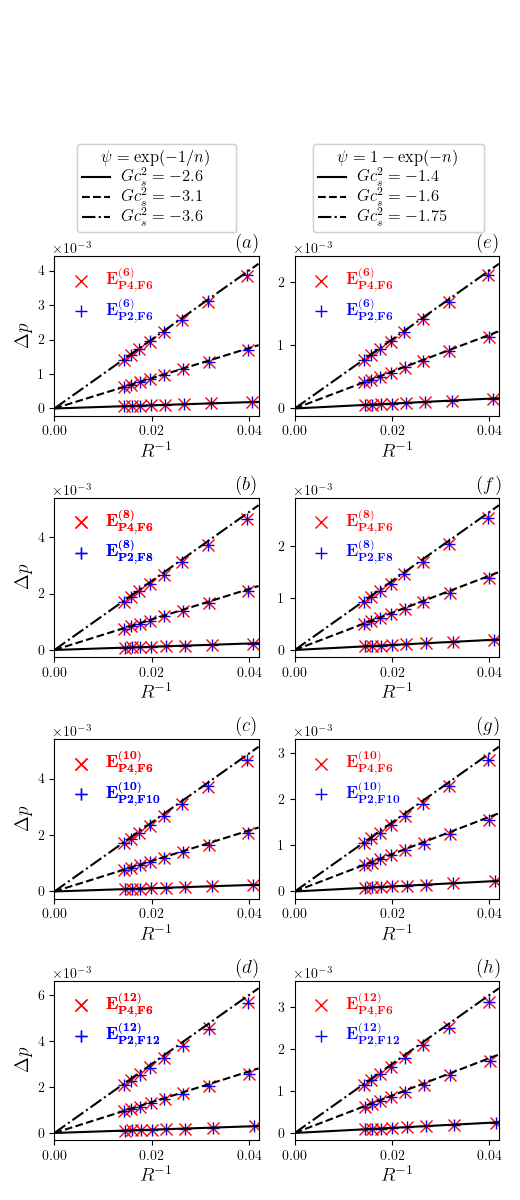

In [12]:
# Display Figure 3 (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_3.png")

## Figure 4

The simulation cell for this figure generates all the data needed for the flat interface results. For the curved interface use the (faster) simulation cells in Figure 3.

*Uncached Equilibrium Densities*

**0 d,  0 h,  27 m,  2 s, OpenCL, Apple M1 CPU (64-bits)**

**0 d,  0 h,  54 m,  36 s, CUDA, GeForce GTX 1070 (64-bits), Ryzen 5 3500X (6-Core) Processor**

**0 d,  0 h,  36 m,  25 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

*Cached Equilibrium Densities*

**0 d,  0 h,  8 m,  20 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

**0 d,  0 h,  16 m,  49 s, CUDA, NVIDIA GeForce GTX 1070 (64-bits), AMD Ryzen 5 3600 6-Core Processor (eGPU, Thunderbolt 3)**

In [13]:
# Flat Interfaces Simulations for the profiles comparison (click arrow to unfold)
import time

import sys
sys.path.append("../../")

########################################################################

from pathlib import Path
reproduced_results = Path("reproduced-results")
if not reproduced_results.is_dir():
    reproduced_results.mkdir()

from sympy import exp as sp_exp
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from IPython.display import display
import numpy as np

from idpy.LBM.SCThermo import ShanChen
from idpy.Utils.ManageData import ManageData
from idpy.LBM.SCFStencils import SCFStencils, BasisVectors
from idpy.LBM.LBM import XIStencils

from idpy.LBM.SCThermo import ShanChanEquilibriumCache
from idpy.LBM.LBM import ShanChenMultiPhase, CheckUConvergence

def GetE2(stencil):
    weights_list = stencil.w_sol[0]
    _value = stencil.e_expr[2]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    return _value

'''
Here we declare the symbol for the density as 'n'
and define the pseudo-potential
'''

n = sp_symbols('n')
psis = [sp_exp(-1/n), 1 - sp_exp(-n)]
psi_codes = {psis[0]: 'exp((NType)(-1./ln))', 
             psis[1]: '1. - exp(-(NType)ln)',}

Gs = {psis[0]: [-2.6, -3.1, -3.6], 
      psis[1]: [-1.4, -1.6, -1.75]}

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")
E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]

    chi_i_expr = 2*w4 - 8*w8 - w5
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)
    
    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Defining output files: Flat interface
'''

stencil_string = {E6_P2F6_sym: 'E6_P2F6', 
                  E6_P4F6_sym: 'E6_P4F6', 
                  E8_P2F8_sym: 'E8_P2F8', 
                  E8_P4F6_sym: 'E8_P4F6', 
                  E10_P2F10_sym: 'E10_P2F10', 
                  E10_P4F6_sym: 'E10_P4F6', 
                  E12_P2F12_sym: 'E12_P2F12', 
                  E12_P4F6_sym: 'E12_P4F6'}

stencil_dict = {E6_P2F6_sym: S5_E6_P2F6, 
                E6_P4F6_sym: S5_E6_P4F6, 
                E8_P2F8_sym: S5_E8_P2F8, 
                E8_P4F6_sym: S5_E8_P4F6, 
                E10_P2F10_sym: S5_E10_P2F10, 
                E10_P4F6_sym: S5_E10_P4F6, 
                E12_P2F12_sym: S5_E12_P2F12, 
                E12_P4F6_sym: S5_E12_P4F6}

stencil_sym_list = [E6_P2F6_sym, E6_P4F6_sym, 
                    E8_P2F8_sym, E8_P4F6_sym,
                    E10_P2F10_sym, E10_P4F6_sym,
                    E12_P2F12_sym, E12_P4F6_sym]

def FlatFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_flat_profile")

def StencilPsiKey(stencil_sym, psi):
    return str(stencil_sym) + "_" + str(psi)

flat_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / FlatFileName(E6_P2F6_sym, psis[0]), 
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / FlatFileName(E6_P2F6_sym, psis[1]), 
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / FlatFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / FlatFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / FlatFileName(E8_P2F8_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / FlatFileName(E8_P2F8_sym, psis[1]), 
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / FlatFileName(E8_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / FlatFileName(E8_P4F6_sym, psis[1]), 
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / FlatFileName(E10_P2F10_sym, psis[0]), 
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / FlatFileName(E10_P2F10_sym, psis[1]), 
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / FlatFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / FlatFileName(E10_P4F6_sym, psis[1]), 
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / FlatFileName(E12_P2F12_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / FlatFileName(E12_P2F12_sym, psis[1]), 
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / FlatFileName(E12_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / FlatFileName(E12_P4F6_sym, psis[1])}

from idpy.Utils.ManageData import ManageData

'''
Simulations Loop
'''
start = time.time()

for _psi in psis:
    print("The pseudo-potential is: ")
    display(_psi)
    for _G in Gs[_psi]:
        print("Coupling Constant G: ", _G)
        for stencil_sym in stencil_sym_list:
            display(stencil_sym)
            _stencil = stencil_dict[stencil_sym]
            _data_out = ManageData(dump_file = flat_files[StencilPsiKey(stencil_sym, _psi)])

            _data_key = _G
            _e2_swap = GetE2(_stencil)

            _is_data_there = False
            if _data_out.Read():
                print("File ", flat_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                print("Checking if data is there...")
                _is_data_there = _data_key in _data_out.WhichData()

                if _is_data_there:
                    print("Data Found! No need to run the simulation")
                    print("To perform the simulation again remove the file:")
                    print(flat_files[StencilPsiKey(stencil_sym, _psi)])
                    print()

            if not _is_data_there:
                print("Data is not there...")
                print("Preparing the simulation...")
                print()
                _lbm = ShanChenMultiPhase(lang = lang, 
                                          dim_sizes = (100, 4), 
                                          xi_stencil = XIStencils['D2Q9'], 
                                          f_stencil = _stencil.PushStencil(), 
                                          psi_code = psi_codes[_psi],
                                          psi_sym = _psi,
                                          SC_G = _G, tau = 1., 
                                          device = device, 
                                          cl_kind = dev_kind, 
                                          optimizer_flag = False)

                print("----------------------------------------------------")
                print("\nComputing/Retrieving flat mechanical equilibrium densities...")
                print("psi: ", _psi, "G: ", _G, "Ws: ", _stencil.w_sol[0])

                _sc_eq_cache = ShanChanEquilibriumCache(stencil = _stencil, 
                                                        psi_f = _psi, G = _G, 
                                                        c2 = XIStencils['D2Q9']['c2'])

                _eq_params = _sc_eq_cache.GetFromCache()
                print("...done!\n")
                print("The mechanical equilibrium densities are:")
                print("n_g (gas): ", _eq_params['n_g'], 
                      ", n_l (liq): ", _eq_params['n_l'])
                print("Surface tension: ", _eq_params['sigma_f'])
                print("(G_c, n_c) (crtitcal G and n): ", (_eq_params['G_c'], 
                                                          _eq_params['n_c']))
                print()
                print("Initializing flat interface")

                '''
                _width: an arbitrary value
                '''
                _width = 41.36574669941303
                _width = 50

                _lbm.InitFlatInterface(n_g = _eq_params['n_g'], n_l = _eq_params['n_l'], 
                                       width = _width, 
                                       direction = 0, full_flag = False)

                print("Running the simulation...")


                _lbm.MainLoop(range(0, 2**20, 2**14),
                              convergence_functions = [CheckUConvergence])

                '''
                Getting a line from the density field
                '''
                _n = _lbm.sims_idpy_memory['n'].D2H()
                _n = _n.reshape(np.flip(_lbm.sims_vars['dim_sizes']))[0,:]
                _data_out.PushData(data = _n, key = _data_key)
                _data_out.Dump()

                print("Ending and deleting LB simulation object")
                _lbm.End()
                del _lbm
                print()
                print()
                
end = time.time()
def PrintElapsedTime(lapse):
    _n_sec_min, _n_min_hrs = 60, 60
    _n_sec_hrs, _n_hrs_day = _n_min_hrs * _n_sec_min, 24
    _n_sec_day = _n_hrs_day * _n_sec_hrs
    
    print(int(end - start)//_n_sec_day, "d, ",
          (int(end - start)//_n_sec_hrs)%_n_hrs_day, "h, ",
          (int(end - start)//_n_sec_min)%_n_min_hrs, "m, ", 
          int(end - start)% _n_sec_min, "s")

PrintElapsedTime(start - end)

The pseudo-potential is: 


exp(-1/n)

Coupling Constant G:  -2.6


\boldsymbol{E}^{(6)}_{P2,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6702295020844407 , n_l (liq):  1.5109412425304467
Surface tension:  0.0045796074761975634
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  4.957944539487921e-09 max_u:  1.5790530877401684e-08
Conv! False True
Step: 32768
u_co

\boldsymbol{E}^{(6)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6702295020844407 , n_l (liq):  1.5109412425304467
Surface tension:  0.0045796074761975634
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  4.957944484074624e-09 max_u:  1.579052983329305e-08
Conv! False True


\boldsymbol{E}^{(8)}_{P2,F8}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6722200315752892 , n_l (liq):  1.5135680294397231
Surface tension:  0.0057124706053652
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  8.709537213201466e-09 max_u:  2.675338764911115e-08
Conv! False True
Step: 

\boldsymbol{E}^{(8)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6722200315752892 , n_l (liq):  1.5135680294397231
Surface tension:  0.0057124706053652
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  8.709536792427158e-09 max_u:  2.675338684086583e-08
Conv! False True
Ste

\boldsymbol{E}^{(10)}_{P2,F10}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6732385240616885 , n_l (liq):  1.514879037627713
Surface tension:  0.006477550040345689
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  1.1068588022794812e-08 max_u:  3.304524903021388e-

\boldsymbol{E}^{(10)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6732385240616885 , n_l (liq):  1.514879037627713
Surface tension:  0.006477550040345689
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  1.1105383698135441e-08 max_u:  3.3164929886125205e-08
Conv! False Tr

\boldsymbol{E}^{(12)}_{P2,F12}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6739809347757383 , n_l (liq):  1.5158209300171448
Surface tension:  0.007161627202550248
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  1.1511642590103503e-08 max_u:

\boldsymbol{E}^{(12)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -2.6 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.6739838180740961 , n_l (liq):  1.515824565715568
Surface tension:  0.007164551952544931
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  1.1613762905337197e-08 max_u:  3.3

\boldsymbol{E}^{(6)}_{P2,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.43006165694367415 , n_l (liq):  2.4215388430355436
Surface tension:  0.04376092917271107
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Ru

\boldsymbol{E}^{(6)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.43006165694367415 , n_l (liq):  2.4215388430355436
Surface tension:  0.043760929172711065
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing

\boldsymbol{E}^{(8)}_{P2,F8}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.438431644669087 , n_l (liq):  2.4353222349681207
Surface tension:  0.053962650786979045
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat

\boldsymbol{E}^{(8)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.438431644669087 , n_l (liq):  2.4353222349681207
Surface tension:  0.053962650786979045
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing f

\boldsymbol{E}^{(10)}_{P2,F10}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.44263098758413233 , n_l (liq):  2.441911483258142
Surface tension:  0.06080926769008053
(G_c, n_c) (crtitcal G and n):  (-2.4630186996435

\boldsymbol{E}^{(10)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.44263098758413233 , n_l (liq):  2.441911483258142
Surface tension:  0.06080926769008053
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializi

\boldsymbol{E}^{(12)}_{P2,F12}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.44565341769271577 , n_l (liq):  2.4465231457235648
Surface tension:  0.06691740552007903
(G_c, n_c) (crtitcal G and n

\boldsymbol{E}^{(12)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.1 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.4456650904789415 , n_l (liq):  2.446540746715355
Surface tension:  0.06694350490145227
(G_c, n_c) (crtitcal G and n):  (-2

\boldsymbol{E}^{(6)}_{P2,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.32524754415041274 , n_l (liq):  3.2094564762725213
Surface tension:  0.09998333182716705
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat interface
Ru

\boldsymbol{E}^{(6)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.32524754415041274 , n_l (liq):  3.2094564762725213
Surface tension:  0.09998333182716704
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing 

\boldsymbol{E}^{(8)}_{P2,F8}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3399136856486635 , n_l (liq):  3.234780625598389
Surface tension:  0.12207221943299669
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing flat 

\boldsymbol{E}^{(8)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3399136856486635 , n_l (liq):  3.234780625598389
Surface tension:  0.12207221943299669
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializing fl

\boldsymbol{E}^{(10)}_{P2,F10}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.34703780355969577 , n_l (liq):  3.246447372110771
Surface tension:  0.1368533034301557
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355

\boldsymbol{E}^{(10)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.34703780355969577 , n_l (liq):  3.246447372110771
Surface tension:  0.1368533034301557
(G_c, n_c) (crtitcal G and n):  (-2.46301869964355, 1.0)

Initializin

\boldsymbol{E}^{(12)}_{P2,F12}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3520723456673053 , n_l (liq):  3.254441022674583
Surface tension:  0.15003697518620146
(G_c, n_c) (crtitcal G and n):

\boldsymbol{E}^{(12)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  exp(-1/n) G:  -3.6 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3520916416415943 , n_l (liq):  3.2544712596418464
Surface tension:  0.15009331696720188
(G_c, n_c) (crtitcal G and n):  (-

1 - exp(-n)

Coupling Constant G:  -1.4


\boldsymbol{E}^{(6)}_{P2,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3696779205408824 , n_l (liq):  1.1475827620768977
Surface tension:  0.0038684300798073213
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  6.192119907047594e-09 max_u:  2.0694610070027813e-08
Conv! False Tr

\boldsymbol{E}^{(6)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3696779205408824 , n_l (liq):  1.1475827620768977
Surface tension:  0.0038684300798073213
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  6.192119831017141e-09 max_u:  2.0694609587784828e-

\boldsymbol{E}^{(8)}_{P2,F8}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3715583994422714 , n_l (liq):  1.1497033192486927
Surface tension:  0.004823621260256074
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  3.3851380570791717e-09 max_u:  1.2897824691417307e-08


\boldsymbol{E}^{(8)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3715583994422714 , n_l (liq):  1.1497033192486927
Surface tension:  0.004823621260256074
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  3.385138280785759e-09 max_u:  1.2897825454593124e-0

\boldsymbol{E}^{(10)}_{P2,F10}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3725199533528827 , n_l (liq):  1.1507619713719328
Surface tension:  0.005468745575458158
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  2.5274412991226146e-08 max_u: 

\boldsymbol{E}^{(10)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3725199533528827 , n_l (liq):  1.1507619713719328
Surface tension:  0.005468745575458158
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  2.5053707807547328e-08 max_u:  7.529557877788849

\boldsymbol{E}^{(12)}_{P2,F12}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3732206275857085 , n_l (liq):  1.1515227249517086
Surface tension:  0.006045599108370173
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  5.31241197

\boldsymbol{E}^{(12)}_{P4,F6}

Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.4 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.3732233484363473 , n_l (liq):  1.1515256617569827
Surface tension:  0.006048065491789803
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializing flat interface
Running the simulation...
Step: 16384
u_conv:  5.289337513323

\boldsymbol{E}^{(6)}_{P2,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.15978311506483497 , n_l (liq):  1.7363419565459288
Surface tension:  0.02904182950727225
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializ

\boldsymbol{E}^{(6)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.15978311506483497 , n_l (liq):  1.7363419565459288
Surface tension:  0.029041829507272247
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805

\boldsymbol{E}^{(8)}_{P2,F8}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.166337173469452 , n_l (liq):  1.7446293143406886
Surface tension:  0.035806591050229666
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.693147180559945

\boldsymbol{E}^{(8)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.166337173469452 , n_l (liq):  1.7446293143406886
Surface tension:  0.035806591050229666
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.693147180559

\boldsymbol{E}^{(10)}_{P2,F10}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.16964297955323332 , n_l (liq):  1.748614829302738
Surface tension:  0.04035198990472164
(G_c, n_c) (crtitcal G and n):  (-1.333333333

\boldsymbol{E}^{(10)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.16964297955323332 , n_l (liq):  1.748614829302738
Surface tension:  0.04035198990472164
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.69314718

\boldsymbol{E}^{(12)}_{P2,F12}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.1720302340777146 , n_l (liq):  1.7514148296511962
Surface tension:  0.044409402552533374
(G_c, n_c) (crtitcal G a

\boldsymbol{E}^{(12)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.6 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.172039467142691 , n_l (liq):  1.751425534097727
Surface tension:  0.0444267428704906
(G_c, n_c) (crtitcal G and n):  (

\boldsymbol{E}^{(6)}_{P2,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [4/15, 1/10, 1/120]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.0893301625176751 , n_l (liq):  2.0805784556192815
Surface tension:  0.05442380227449607
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805599453)

Initializ

\boldsymbol{E}^{(6)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [19/60, 1/15, -1/240, 1/120, -1/480]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.0893301625176751 , n_l (liq):  2.0805784556192815
Surface tension:  0.054423802274496065
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471805

\boldsymbol{E}^{(8)}_{P2,F8}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [4/21, 4/45, 1/60, 2/315, 1/5040]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.09865590707179064 , n_l (liq):  2.092986815291739
Surface tension:  0.06652909623882226
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.69314718055994

\boldsymbol{E}^{(8)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [4/15, 4/105, -1/420, 2/105, -1/336]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.09865590707179064 , n_l (liq):  2.092986815291739
Surface tension:  0.06652909623882226
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.69314718055

\boldsymbol{E}^{(10)}_{P2,F10}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [262/1785, 93/1190, 7/340, 6/595, 9/9520, 2/5355, 1/7140]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.1032929649988076 , n_l (liq):  2.0988036142720925
Surface tension:  0.07465048863528502
(G_c, n_c) (crtitcal G and n):  (-1.33333333

\boldsymbol{E}^{(10)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [58/255, 4/255, -1/1020, 7/255, -1/272]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.1032929649988076 , n_l (liq):  2.0988036142720925
Surface tension:  0.07465048863528502
(G_c, n_c) (crtitcal G and n):  (-1.3333333333333333, 0.6931471

\boldsymbol{E}^{(12)}_{P2,F12}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [68/585, 68/1001, 1/45, 62/5005, 1/520, 4/4095, 2/4095, 2/45045, 1/480480, 0]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.10661323364925368 , n_l (liq):  2.102830366359328
Surface tension:  0.08190071819484708
(G_c, n_c) (crtitcal G a

\boldsymbol{E}^{(12)}_{P4,F6}

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_flat_profile exists!
Checking if data is there...
Data is not there...
Preparing the simulation...

CUDA:  {'Name': 'NVIDIA GeForce RTX 4090', 'Device': '0', 'Memory': '25386352640', 'DrvVersion': (12, 4, 0)}
{'PopType': 'double', 'NType': 'double', 'UType': 'double', 'PsiType': 'double', 'ChiType': 'double', 'ThetaType': 'double', 'MuType': 'double', 'SCFType': 'double', 'NoiseType': 'double', 'ForceType': 'double', 'SType': 'int', 'WType': 'double', 'LengthType': 'double', 'FlagType': 'unsigned char'}
----------------------------------------------------

Computing/Retrieving flat mechanical equilibrium densities...
psi:  1 - exp(-n) G:  -1.75 Ws:  [254419/1350390, -4474/675195, 2237/5401560, 96737/2700780, -1575/360104]
...done!

The mechanical equilibrium densities are:
n_g (gas):  0.10662602897448126 , n_l (liq):  2.1028456651997653
Surface tension:  0.08193171072778563
(G_c, n_c) (crtitcal G and n

In [15]:
# Figure 4 (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_4.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]


Surface tension (G =  -2.6 :  0.0045796074761975634 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.04376092917271107 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.09998333182716705 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.0057124706053652 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.053962650786979045 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.12207221943299669 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.006477550040345689 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.06080926769008053 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.1368533034301557 ), psi =  exp(-1/n)
Surface tension (G =  -2.6 :  0.007161627202550248 ), psi =  exp(-1/n)
Surface tension (G =  -3.1 :  0.06691740552007903 ), psi =  exp(-1/n)
Surface tension (G =  -3.6 :  0.15003697518620146 ), psi =  exp(-1/n)
Surface tension (G =  -1.4 :  0.0038684300798073213 ), psi =  1 - exp(-n)
Surface tension (G =  -1.6 :  0.02904182950727225 ), psi =  1 - exp(-n)
Surface ten

/home/ubuntu/idea.deploy/papers/arXiv-2009.12522/figure_4.py:853: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  #################### SAVING ####################


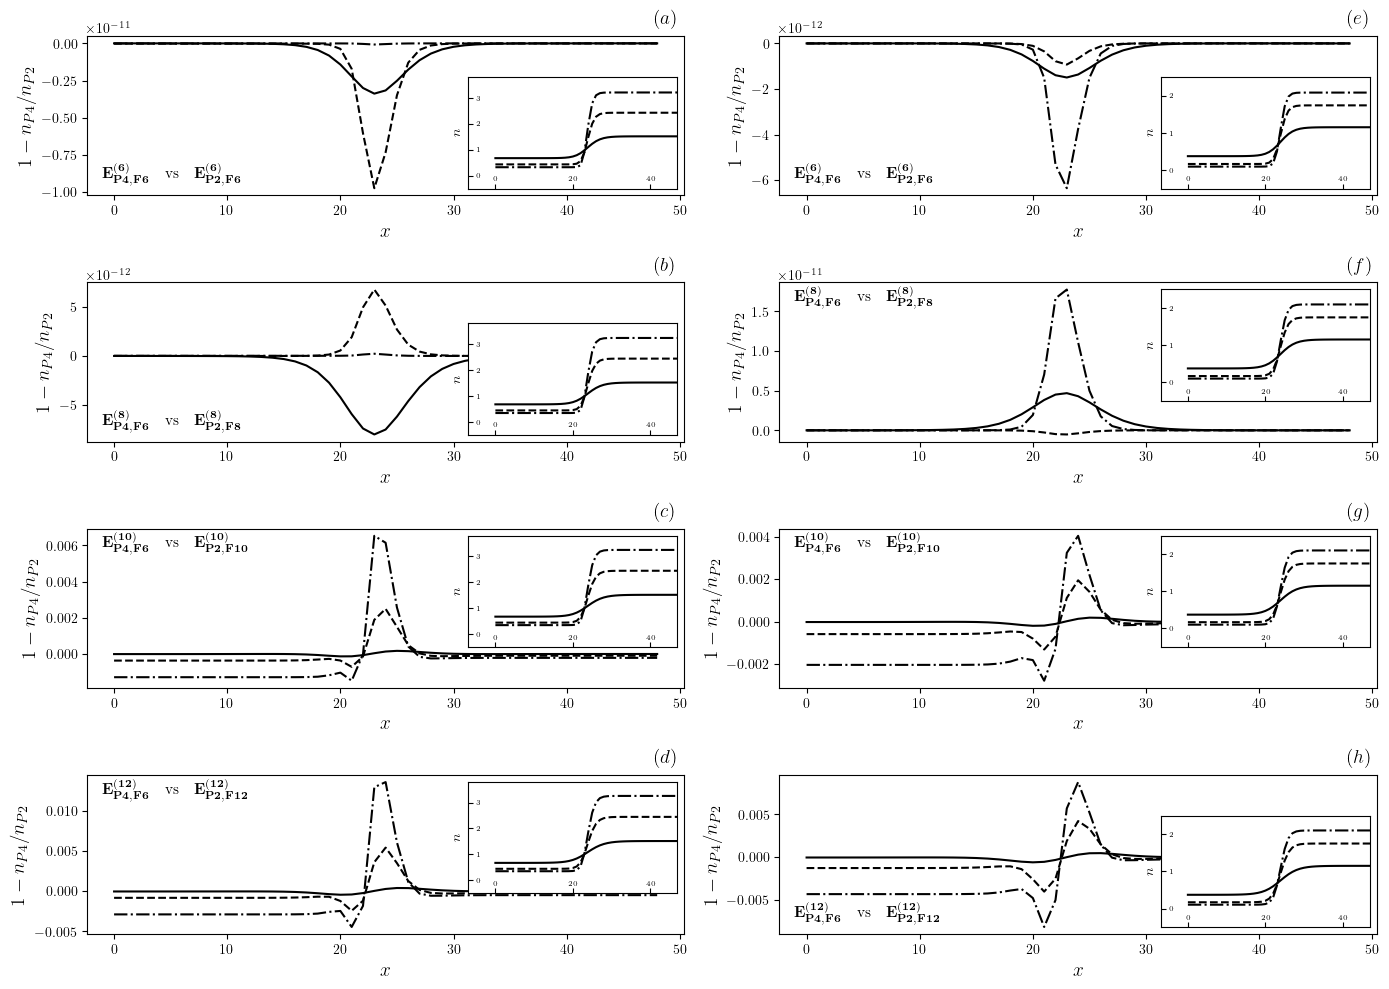

In [16]:
# Display Figure 4 (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_4.png")

## Figure 5

*Uncached Equilibrium Densities*

**0 d,  0 h,  22 m,  27 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

*Cached Equilibrium Densities*

**0 d,  0 h,  16 m,  21 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

In [17]:
# Droplets Simulations for the Laplace data and velocity fields (click arrow to unfold)
import time
start = time.time()

import sys
sys.path.append("../../")

########################################################################

from pathlib import Path
reproduced_results = Path("reproduced-results")
if not reproduced_results.is_dir():
    reproduced_results.mkdir()

from sympy import exp as sp_exp
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from sympy import lambdify as sp_lambdify
from IPython.display import display
import numpy as np

from idpy.LBM.SCThermo import ShanChen
from idpy.Utils.ManageData import ManageData
from idpy.LBM.SCFStencils import SCFStencils, BasisVectors
from idpy.LBM.LBM import XIStencils

from idpy.LBM.SCThermo import ShanChanEquilibriumCache
from idpy.LBM.LBM import ShanChenMultiPhase, CheckUConvergence
from idpy.IdpyCode import IdpyMemory

def GetE2(stencil):
    weights_list = stencil.w_sol[0]
    _value = stencil.e_expr[2]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    return _value

'''
Here we declare the symbol for the density as 'n'
and define the pseudo-potential
'''

n = sp_symbols('n')
psis = [sp_exp(-1/n), 1 - sp_exp(-n)]
psi_codes = {psis[0]: 'exp((NType)(-1./ln))', 
             psis[1]: '1. - exp(-(NType)ln)',}

Gs = {psis[0]: [-2.6, -3.1, -3.6], 
      psis[1]: [-1.4, -1.6, -1.75]}

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")
E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]

    chi_i_expr = 2*w4 - 8*w8 - w5
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)    
    
    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Defining output files: Flat interface
'''

stencil_string = {E6_P2F6_sym: 'E6_P2F6', 
                  E6_P4F6_sym: 'E6_P4F6', 
                  E8_P2F8_sym: 'E8_P2F8', 
                  E8_P4F6_sym: 'E8_P4F6', 
                  E10_P2F10_sym: 'E10_P2F10', 
                  E10_P4F6_sym: 'E10_P4F6', 
                  E12_P2F12_sym: 'E12_P2F12', 
                  E12_P4F6_sym: 'E12_P4F6'}

stencil_dict = {E6_P2F6_sym: S5_E6_P2F6, 
                E6_P4F6_sym: S5_E6_P4F6, 
                E8_P2F8_sym: S5_E8_P2F8, 
                E8_P4F6_sym: S5_E8_P4F6, 
                E10_P2F10_sym: S5_E10_P2F10, 
                E10_P4F6_sym: S5_E10_P4F6, 
                E12_P2F12_sym: S5_E12_P2F12, 
                E12_P4F6_sym: S5_E12_P4F6}

stencil_sym_list = [E6_P2F6_sym, E6_P4F6_sym, 
                    E8_P2F8_sym, E8_P4F6_sym, 
                    E10_P2F10_sym, E10_P4F6_sym, 
                    E12_P2F12_sym, E12_P4F6_sym]

#stencil_sym_list = [E12_P2F12_sym, E12_P4F6_sym]

def LaplaceFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_laplace")

def DropletsFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_droplets")

def StencilPsiKey(stencil_sym, psi):
    return str(stencil_sym) + "_" + str(psi)

laplace_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[0]), 
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[1]), 
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[1]), 
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[0]), 
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[1]), 
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[1]),
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[1]), 
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[1])}

droplets_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[0]),  
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[0]),  
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[0]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[0]),  
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[0]),  
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[0]),
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[1]),  
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[1]),  
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[1]),  
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[1]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[1]),  
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[1])}

from idpy.Utils.ManageData import ManageData
'''
Simulation Loop
'''
for _psi in psis[0:1]:
    print("The pseudo-potential is: ")
    display(_psi)
    for _G in Gs[_psi][-1:]:
        print("Coupling Constant G: ", _G)
        for stencil_sym in stencil_sym_list:
            display(stencil_sym)
            _stencil = stencil_dict[stencil_sym]
            _data_out_laplace = ManageData(dump_file = laplace_files[StencilPsiKey(stencil_sym, _psi)])
            _data_out_droplets = ManageData(dump_file = droplets_files[StencilPsiKey(stencil_sym, _psi)])            
            
            _e2_swap = GetE2(_stencil)
            print("e2: ", _e2_swap)
            
            for L in [255]:
                print("L: ", L, "R: ", L/5.)

                _data_key = str(_G) + "_" + str(L)

                _is_data_there_laplace = False
                if _data_out_laplace.Read():
                    print("File ", laplace_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                    print("Checking if data is there...")
                    _is_data_there_laplace = _data_key in _data_out_laplace.WhichData()

                    if _is_data_there_laplace:
                        print("Data Found! No need to run the simulation")
                        print("To perform the simulation again remove the file:")
                        print(laplace_files[StencilPsiKey(stencil_sym, _psi)])
                        print()                                        
                        
                _is_data_there_droplets = False
                if L in [255, 351]:
                    if _data_out_droplets.Read():
                        print("File ", droplets_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                        print("Checking if data is there...")
                        _is_data_there_droplets = _data_key in _data_out_droplets.WhichData()

                        if _is_data_there_droplets:
                            print("Data Found! No need to run the simulation")
                            print("To perform the simulation again remove the file:")
                            print(droplets_files[StencilPsiKey(stencil_sym, _psi)])
                            print()
                else:
                    _is_data_there_droplets = True

                    

                if not _is_data_there_laplace or not _is_data_there_droplets:
                    print("Data is not there...")
                    print("Preparing the simulation...")
                    print()
                    _lbm = ShanChenMultiPhase(lang = lang, 
                                              dim_sizes = (L, L), 
                                              xi_stencil = XIStencils['D2Q9'], 
                                              f_stencil = _stencil.PushStencil(), 
                                              psi_code = psi_codes[_psi],
                                              psi_sym = _psi,
                                              SC_G = _G, tau = 1., 
                                              device = device, 
                                              cl_kind = dev_kind, 
                                              optimizer_flag = True)

                    print("----------------------------------------------------")
                    print("\nComputing/Retrieving flat mechanical equilibrium densities...")
                    print("psi: ", _psi, "G: ", _G, "Ws: ", _stencil.w_sol[0])

                    _sc_eq_cache = ShanChanEquilibriumCache(stencil = _stencil, 
                                                            psi_f = _psi, G = _G, 
                                                            c2 = XIStencils['D2Q9']['c2'])

                    _eq_params = _sc_eq_cache.GetFromCache()
                    print("...done!\n")
                    print("The mechanical equilibrium densities are:")
                    print("n_g (gas): ", _eq_params['n_g'], 
                          ", n_l (liq): ", _eq_params['n_l'])
                    print("Surface tension: ", _eq_params['sigma_f'])
                    print("(G_c, n_c) (crtitcal G and n): ", (_eq_params['G_c'], 
                                                              _eq_params['n_c']))
                    print()
                    print("Initializing flat interface")

                    _lbm.InitRadialInterface(n_g = _eq_params['n_g'], n_l = _eq_params['n_l'], 
                                             R = L/5., full_flag = True)

                    print("Running the simulation...")


                    _lbm.MainLoop(range(0, 2**22, 2**14),
                                  convergence_functions = [CheckUConvergence])

                    '''
                    Getting average density, inner and outer density for
                    computing the Gibbs radius
                    '''
                    
                    _n_ave = IdpyMemory.Sum(_lbm.sims_idpy_memory['n'])/(L*L)
                    _n = _lbm.sims_idpy_memory['n'].D2H()
                    _n = _n.reshape(np.flip(_lbm.sims_vars['dim_sizes']))
                    
                    _center = tuple(_lbm.sims_vars['dim_center'])
                    _n_in = _n[_center]
                    _n_out = _n[(L - 1, L - 1)]
                    
                    _R_Gibbs = L*np.sqrt((_n_ave - _n_out)/(np.pi * (_n_in - _n_out)))
                    
                    def BulkP(n_value, _e2):
                        _psi_f = sp_lambdify(n, _psi)
                        p = n_value * XIStencils['D2Q9']['c2']
                        p += 0.5 * _G * _e2 * (_psi_f(n_value)) ** 2
                        return p
                                        
                    _p_in, _p_out = BulkP(_n_in, _e2_swap), BulkP(_n_out, _e2_swap)
                    _delta_p = _p_in - _p_out
                    
                    print("L: ", L, "Start R: ", L/5., "R_Gibbs: ", _R_Gibbs)
                    print("Estimated surface tension: ", _delta_p * _R_Gibbs)
                    print("Analytic surface tension: ", _eq_params['sigma_f'])
                    
                    _dict_out = {'delta_p': _delta_p, 
                                 'R_Gibbs': _R_Gibbs}
                    
                    if not _is_data_there_laplace:
                        _data_out_laplace.PushData(data = _dict_out, key = _data_key)
                        _data_out_laplace.Dump()
                        
                    if not _is_data_there_droplets:
                        _u = _lbm.sims_idpy_memory['u'].D2H()                    
                        _data_out_droplets.PushData(data = _u, key = _data_key)
                        _data_out_droplets.Dump()                        

                    print("Ending and deleting LB simulation object")
                    _lbm.End()
                    del _lbm
                    print()
                    print()
                
end = time.time()
def PrintElapsedTime(lapse):
    _n_sec_min, _n_min_hrs = 60, 60
    _n_sec_hrs, _n_hrs_day = _n_min_hrs * _n_sec_min, 24
    _n_sec_day = _n_hrs_day * _n_sec_hrs
    
    print(int(end - start)//_n_sec_day, "d, ",
          (int(end - start)//_n_sec_hrs)%_n_hrs_day, "h, ",
          (int(end - start)//_n_sec_min)%_n_min_hrs, "m, ", 
          int(end - start)% _n_sec_min, "s")

PrintElapsedTime(start - end)

The pseudo-potential is: 


exp(-1/n)

Coupling Constant G:  -3.6


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets



\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets



\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets



\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets



\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets

0 d,  0 h,  0 m,  1 s


### Figure 5 (a) \& (b)

In [18]:
# Figure 5 (a), (b) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_5_ab.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
norm_2iso_min:  1.0130793043174328e-12 , norm_2iso_max:  0.018645160097650233
norm_2niso_min:  4.7506550435859566e-12 , norm_2niso_max:  0.02165671177644448


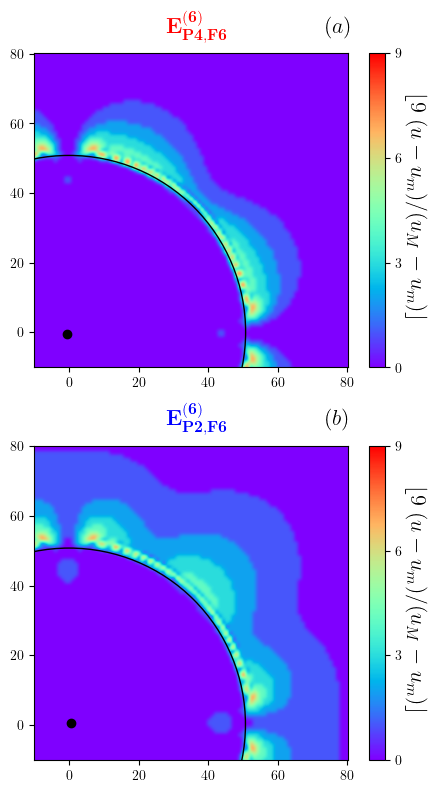

In [19]:
# Display Figure 5 (a), (b) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_5_ab.png")

### Figure 5 (c) \& (d)

In [20]:
# Figure 5 (c), (d) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_5_cd.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
norm_2iso_min:  2.1199936735074745e-13 , norm_2iso_max:  0.0118247330699254
norm_2niso_min:  1.601618907491541e-13 , norm_2niso_max:  0.013924850817890844


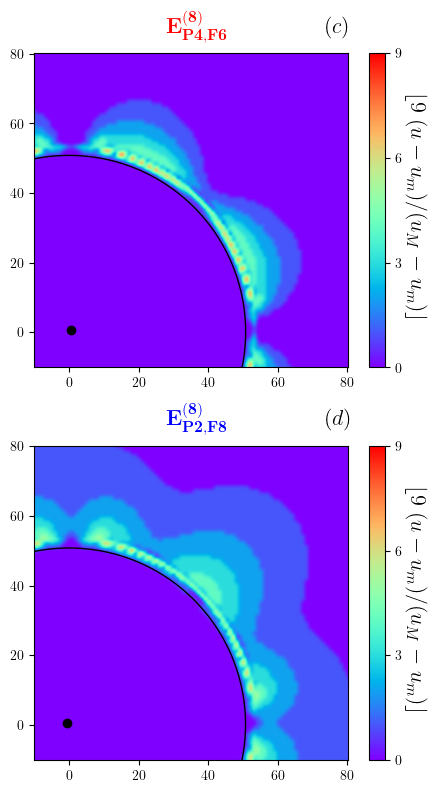

In [21]:
# Display Figure 5 (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_5_cd.png")

### Figure 5 (e) \& (f)

In [22]:
# Figure 5 (e), (f) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_5_ef.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
norm_2iso_min:  1.9007613316480596e-13 , norm_2iso_max:  0.008763445818093872
norm_2niso_min:  3.464800631272915e-14 , norm_2niso_max:  0.01023344837915907


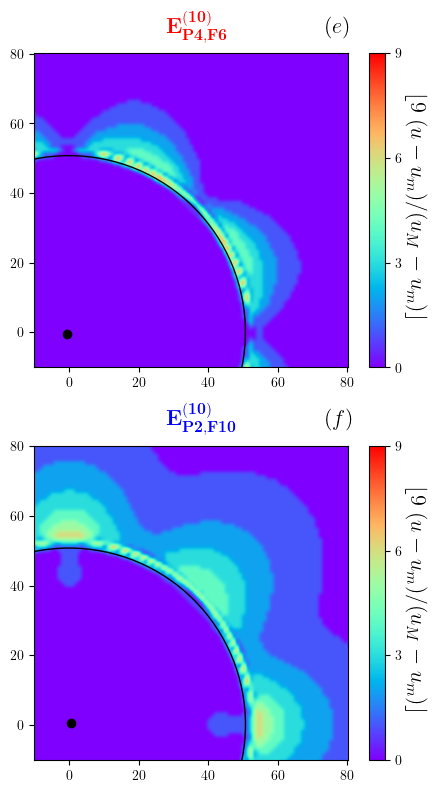

In [23]:
# Display Figure 5 (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_5_ef.png")

### Figure 5 (g) \& (h)

In [24]:
# Figure 5 (g), (h) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_5_gh.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
norm_2iso_min:  5.86346246522233e-16 , norm_2iso_max:  0.0071966011689031046
norm_2niso_min:  2.7447085766335697e-16 , norm_2niso_max:  0.007620835675515741


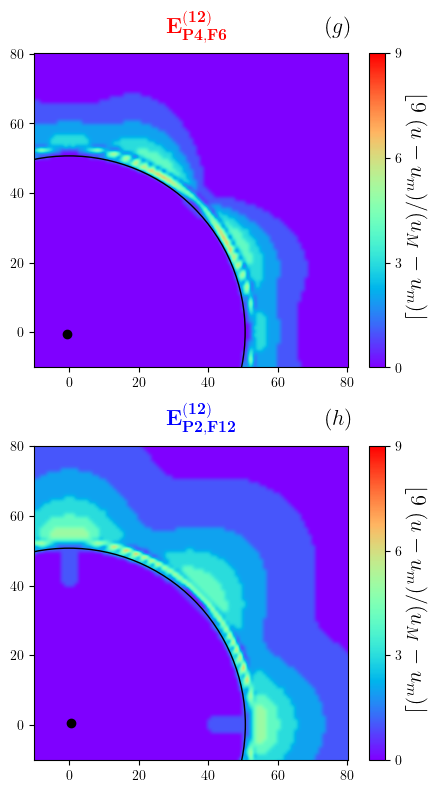

In [25]:
# Display Figure 5 (g), (h) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_5_gh.png")

## Figure 6

*Uncached Equilibrium Densities*

**0 d,  0 h,  38 m,  3 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

In [26]:
# Droplets Simulations for the Laplace data and velocity fields (click arrow to unfold)
import time
start = time.time()

import sys
sys.path.append("../../")

########################################################################

from pathlib import Path
reproduced_results = Path("reproduced-results")
if not reproduced_results.is_dir():
    reproduced_results.mkdir()

from sympy import exp as sp_exp
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from sympy import lambdify as sp_lambdify
from IPython.display import display
import numpy as np

from idpy.LBM.SCThermo import ShanChen
from idpy.Utils.ManageData import ManageData
from idpy.LBM.SCFStencils import SCFStencils, BasisVectors
from idpy.LBM.LBM import XIStencils

from idpy.LBM.SCThermo import ShanChanEquilibriumCache
from idpy.LBM.LBM import ShanChenMultiPhase, CheckUConvergence
from idpy.IdpyCode import IdpyMemory

def GetE2(stencil):
    weights_list = stencil.w_sol[0]
    _value = stencil.e_expr[2]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    return _value

'''
Here we declare the symbol for the density as 'n'
and define the pseudo-potential
'''

n = sp_symbols('n')
psis = [sp_exp(-1/n), 1 - sp_exp(-n)]
psi_codes = {psis[0]: 'exp((NType)(-1./ln))', 
             psis[1]: '1. - exp(-(NType)ln)',}

Gs = {psis[0]: [-2.6, -3.1, -3.6], 
      psis[1]: [-1.4, -1.6, -1.75]}

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")
E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]

    chi_i_expr = 2*w4 - 8*w8 - w5
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)    
    
    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Defining output files: Flat interface
'''

stencil_string = {E6_P2F6_sym: 'E6_P2F6', 
                  E6_P4F6_sym: 'E6_P4F6', 
                  E8_P2F8_sym: 'E8_P2F8', 
                  E8_P4F6_sym: 'E8_P4F6', 
                  E10_P2F10_sym: 'E10_P2F10', 
                  E10_P4F6_sym: 'E10_P4F6', 
                  E12_P2F12_sym: 'E12_P2F12', 
                  E12_P4F6_sym: 'E12_P4F6'}

stencil_dict = {E6_P2F6_sym: S5_E6_P2F6, 
                E6_P4F6_sym: S5_E6_P4F6, 
                E8_P2F8_sym: S5_E8_P2F8, 
                E8_P4F6_sym: S5_E8_P4F6, 
                E10_P2F10_sym: S5_E10_P2F10, 
                E10_P4F6_sym: S5_E10_P4F6, 
                E12_P2F12_sym: S5_E12_P2F12, 
                E12_P4F6_sym: S5_E12_P4F6}

stencil_sym_list = [E6_P2F6_sym, E6_P4F6_sym, 
                    E8_P2F8_sym, E8_P4F6_sym, 
                    E10_P2F10_sym, E10_P4F6_sym, 
                    E12_P2F12_sym, E12_P4F6_sym]

#stencil_sym_list = [E12_P2F12_sym, E12_P4F6_sym]

def LaplaceFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_laplace")

def DropletsFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_droplets")

def StencilPsiKey(stencil_sym, psi):
    return str(stencil_sym) + "_" + str(psi)

laplace_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[0]), 
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[1]), 
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[1]), 
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[0]), 
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[1]), 
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[1]),
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[1]), 
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[1])}

droplets_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[0]),  
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[0]),  
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[0]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[0]),  
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[0]),  
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[0]),
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[1]),  
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[1]),  
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[1]),  
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[1]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[1]),  
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[1])}

from idpy.Utils.ManageData import ManageData
'''
Simulation Loop
'''
for _psi in psis:
    print("The pseudo-potential is: ")
    display(_psi)
    for _G in Gs[_psi][-1:]:
        print("Coupling Constant G: ", _G)
        for stencil_sym in stencil_sym_list:
            display(stencil_sym)
            _stencil = stencil_dict[stencil_sym]
            _data_out_laplace = ManageData(dump_file = laplace_files[StencilPsiKey(stencil_sym, _psi)])
            _data_out_droplets = ManageData(dump_file = droplets_files[StencilPsiKey(stencil_sym, _psi)])            
            
            _e2_swap = GetE2(_stencil)
            print("e2: ", _e2_swap)
            
            for L in [255]:
                print("L: ", L, "R: ", L/5.)

                _data_key = str(_G) + "_" + str(L)

                _is_data_there_laplace = False
                if _data_out_laplace.Read():
                    print("File ", laplace_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                    print("Checking if data is there...")
                    _is_data_there_laplace = _data_key in _data_out_laplace.WhichData()

                    if _is_data_there_laplace:
                        print("Data Found! No need to run the simulation")
                        print("To perform the simulation again remove the file:")
                        print(laplace_files[StencilPsiKey(stencil_sym, _psi)])
                        print()                                        
                        
                _is_data_there_droplets = False
                if L in [255, 351]:
                    if _data_out_droplets.Read():
                        print("File ", droplets_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                        print("Checking if data is there...")
                        _is_data_there_droplets = _data_key in _data_out_droplets.WhichData()

                        if _is_data_there_droplets:
                            print("Data Found! No need to run the simulation")
                            print("To perform the simulation again remove the file:")
                            print(droplets_files[StencilPsiKey(stencil_sym, _psi)])
                            print()
                else:
                    _is_data_there_droplets = True

                    

                if not _is_data_there_laplace or not _is_data_there_droplets:
                    print("Data is not there...")
                    print("Preparing the simulation...")
                    print()
                    _lbm = ShanChenMultiPhase(lang = lang, 
                                              dim_sizes = (L, L), 
                                              xi_stencil = XIStencils['D2Q9'], 
                                              f_stencil = _stencil.PushStencil(), 
                                              psi_code = psi_codes[_psi],
                                              psi_sym = _psi,
                                              SC_G = _G, tau = 1., 
                                              device = device, 
                                              cl_kind = dev_kind, 
                                              optimizer_flag = True)

                    print("----------------------------------------------------")
                    print("\nComputing/Retrieving flat mechanical equilibrium densities...")
                    print("psi: ", _psi, "G: ", _G, "Ws: ", _stencil.w_sol[0])

                    _sc_eq_cache = ShanChanEquilibriumCache(stencil = _stencil, 
                                                            psi_f = _psi, G = _G, 
                                                            c2 = XIStencils['D2Q9']['c2'])

                    _eq_params = _sc_eq_cache.GetFromCache()
                    print("...done!\n")
                    print("The mechanical equilibrium densities are:")
                    print("n_g (gas): ", _eq_params['n_g'], 
                          ", n_l (liq): ", _eq_params['n_l'])
                    print("Surface tension: ", _eq_params['sigma_f'])
                    print("(G_c, n_c) (crtitcal G and n): ", (_eq_params['G_c'], 
                                                              _eq_params['n_c']))
                    print()
                    print("Initializing flat interface")

                    _lbm.InitRadialInterface(n_g = _eq_params['n_g'], n_l = _eq_params['n_l'], 
                                             R = L/5., full_flag = True)

                    print("Running the simulation...")


                    _lbm.MainLoop(range(0, 2**22, 2**14),
                                  convergence_functions = [CheckUConvergence])

                    '''
                    Getting average density, inner and outer density for
                    computing the Gibbs radius
                    '''
                    
                    _n_ave = IdpyMemory.Sum(_lbm.sims_idpy_memory['n'])/(L*L)
                    _n = _lbm.sims_idpy_memory['n'].D2H()
                    _n = _n.reshape(np.flip(_lbm.sims_vars['dim_sizes']))
                    
                    _center = tuple(_lbm.sims_vars['dim_center'])
                    _n_in = _n[_center]
                    _n_out = _n[(L - 1, L - 1)]
                    
                    _R_Gibbs = L*np.sqrt((_n_ave - _n_out)/(np.pi * (_n_in - _n_out)))
                    
                    def BulkP(n_value, _e2):
                        _psi_f = sp_lambdify(n, _psi)
                        p = n_value * XIStencils['D2Q9']['c2']
                        p += 0.5 * _G * _e2 * (_psi_f(n_value)) ** 2
                        return p
                                        
                    _p_in, _p_out = BulkP(_n_in, _e2_swap), BulkP(_n_out, _e2_swap)
                    _delta_p = _p_in - _p_out
                    
                    print("L: ", L, "Start R: ", L/5., "R_Gibbs: ", _R_Gibbs)
                    print("Estimated surface tension: ", _delta_p * _R_Gibbs)
                    print("Analytic surface tension: ", _eq_params['sigma_f'])
                    
                    _dict_out = {'delta_p': _delta_p, 
                                 'R_Gibbs': _R_Gibbs}
                    
                    if not _is_data_there_laplace:
                        _data_out_laplace.PushData(data = _dict_out, key = _data_key)
                        _data_out_laplace.Dump()
                        
                    if not _is_data_there_droplets:
                        _u = _lbm.sims_idpy_memory['u'].D2H()                    
                        _data_out_droplets.PushData(data = _u, key = _data_key)
                        _data_out_droplets.Dump()                        

                    print("Ending and deleting LB simulation object")
                    _lbm.End()
                    del _lbm
                    print()
                    print()
                
end = time.time()
def PrintElapsedTime(lapse):
    _n_sec_min, _n_min_hrs = 60, 60
    _n_sec_hrs, _n_hrs_day = _n_min_hrs * _n_sec_min, 24
    _n_sec_day = _n_hrs_day * _n_sec_hrs
    
    print(int(end - start)//_n_sec_day, "d, ",
          (int(end - start)//_n_sec_hrs)%_n_hrs_day, "h, ",
          (int(end - start)//_n_sec_min)%_n_min_hrs, "m, ", 
          int(end - start)% _n_sec_min, "s")

PrintElapsedTime(start - end)

The pseudo-potential is: 


exp(-1/n)

Coupling Constant G:  -3.6


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets



\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets



\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets



\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets



\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets



\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets

The pseudo-potential is: 


1 - exp(-n)

Coupling Constant G:  -1.75


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_droplets



\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_droplets



\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_droplets



\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_droplets



\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_droplets



\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_droplets



\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_droplets



\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_droplets

0 d,  0 h,  0 m,  1 s


### Figure 6 (a), (b), (c) and (d)

In [28]:
# Figure 6 (a), (b), (c) and (d) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run "figure_6_abcd.py" {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
File 'AverageProfiles' not found (!): computing and saving the average profiles


/home/ubuntu/idea.deploy/papers/arXiv-2009.12522/figure_6_abcd.py:219: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  


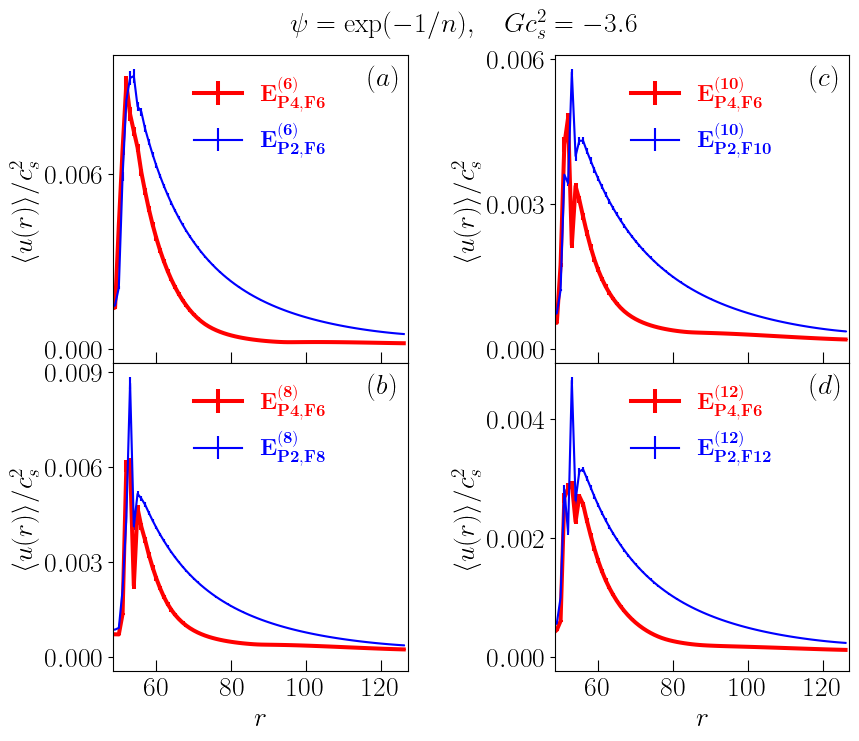

In [29]:
# Display Figure 6 (a), (b), (c) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_6_abcd.png")

### Figure 6 (e), (f), (g) and (h)

In [30]:
# Figure 6 (e), (f), (g) and (h) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run "figure_6_efgh.py" {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]


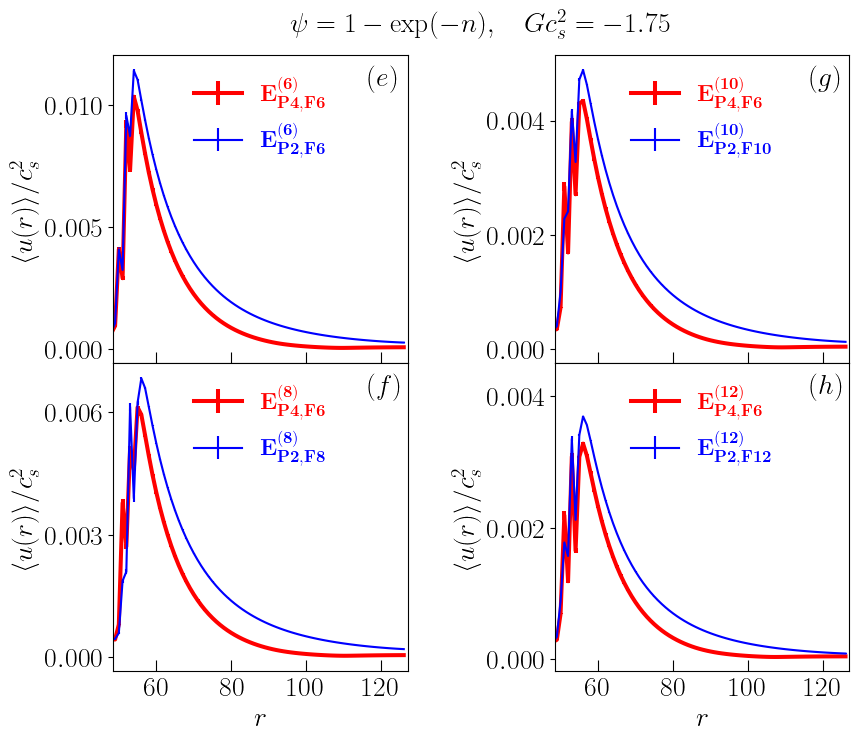

In [31]:
# Display Figure 6 (e), (f), (g), (h) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_6_efgh.png")

## Figure 7

*Cached Equilibrium Densities*

**0 d,  1 h,  9 m,  59 s, OpenCL, AMD Radeon RX 590 (64-bits), Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz**

In [32]:
# Droplets Simulations for the Laplace data and velocity fields (click arrow to unfold)
import time
start = time.time()

import sys
sys.path.append("../../")

########################################################################

from pathlib import Path
reproduced_results = Path("reproduced-results")
if not reproduced_results.is_dir():
    reproduced_results.mkdir()

from sympy import exp as sp_exp
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from sympy import lambdify as sp_lambdify
from IPython.display import display
import numpy as np

from idpy.LBM.SCThermo import ShanChen
from idpy.Utils.ManageData import ManageData
from idpy.LBM.SCFStencils import SCFStencils, BasisVectors
from idpy.LBM.LBM import XIStencils

from idpy.LBM.SCThermo import ShanChanEquilibriumCache
from idpy.LBM.LBM import ShanChenMultiPhase, CheckUConvergence
from idpy.IdpyCode import IdpyMemory

def GetE2(stencil):
    weights_list = stencil.w_sol[0]
    _value = stencil.e_expr[2]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    return _value

'''
Here we declare the symbol for the density as 'n'
and define the pseudo-potential
'''

n = sp_symbols('n')
psis = [sp_exp(-1/n), 1 - sp_exp(-n)]
psi_codes = {psis[0]: 'exp((NType)(-1./ln))', 
             psis[1]: '1. - exp(-(NType)ln)',}

Gs = {psis[0]: [-2.6, -3.1, -3.6], 
      psis[1]: [-1.4, -1.6, -1.75]}

E6_P2F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P2\,F6}")
E8_P2F8_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P2\,F8}")
E10_P2F10_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P2\,F10}")
E12_P2F12_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P2\,F12}")
E6_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(6)}_{P4\,F6}")
E8_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(8)}_{P4\,F6}")
E10_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(10)}_{P4\,F6}")
E12_P4F6_sym = sp_symbols("\\boldsymbol{E}^{(12)}_{P4\,F6}")

'''
Getting usual weights
'''

if True:
    '''
    E^6_F2P6
    '''
    S5_E6_P2F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4])
    S5_E6_P2F6_W = S5_E6_P2F6.FindWeights()

    '''
    E^8_F2P8
    '''
    S5_E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])
    S5_E8_P2F8_W = S5_E8_P2F8.FindWeights()

    '''
    E^10_F2P10
    '''
    S5_E10_P2F10 = SCFStencils(E = BasisVectors(x_max = 3), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10])
    S5_E10_P2F10_W = S5_E10_P2F10.FindWeights()

    '''
    E^12_F2P12
    '''
    S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                               len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])
    S5_E12_P2F12_W = S5_E12_P2F12.FindWeights()

'''
Getting new weights: always up to w(8)
'''
if True:
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8]

    chi_i_expr = 2*w4 - 8*w8 - w5
    eps_expr = (48*w4 + 96*w5 + 96*w8)
    eps_expr /= (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8)    
    
    '''
    E^6_F4P6
    '''
    S5_E6_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E6_P4F6.GetWolfEqs()
    S5_E6_P4F6.GetTypEqs()

    cond_e4 = S5_E6_P4F6.e_expr[4] - sp_Rational('2/5')
    cond_e2 = S5_E6_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('2/17')
    cond_chi_i = chi_i_expr

    S5_E6_P4F6_eqs = [cond_e2,
                      cond_eps, 
                      cond_chi_i, 
                      S5_E6_P4F6.typ_eq_s[4][0],
                      S5_E6_P4F6.typ_eq_s[6][0]]

    S5_E6_P4F6_W = S5_E6_P4F6.FindWeights(S5_E6_P4F6_eqs)

    '''
    E^8_P4F6
    '''
    S5_E8_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                             len_2s = [1, 2, 4, 5, 8])

    S5_E8_P4F6.GetWolfEqs()
    S5_E8_P4F6.GetTypEqs()

    cond_e4 = S5_E8_P4F6.e_expr[4] - sp_Rational('4/7')
    cond_e2 = S5_E8_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('10/31')
    cond_chi_i = chi_i_expr

    S5_E8_P4F6_eqs = [cond_e2, 
                      cond_eps, 
                      cond_chi_i, 
                      S5_E8_P4F6.typ_eq_s[4][0],
                      S5_E8_P4F6.typ_eq_s[6][0]]

    S5_E8_P4F6_W = S5_E8_P4F6.FindWeights(S5_E8_P4F6_eqs)

    '''
    E^10_P4F6
    '''
    S5_E10_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E10_P4F6.GetWolfEqs()
    S5_E10_P4F6.GetTypEqs()

    cond_e4 = S5_E10_P4F6.e_expr[4] - sp_Rational('12/17')
    cond_e2 = S5_E10_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational('38/89')
    cond_chi_i = chi_i_expr

    S5_E10_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i, 
                       S5_E10_P4F6.typ_eq_s[4][0],
                       S5_E10_P4F6.typ_eq_s[6][0]]

    S5_E10_P4F6_W = S5_E10_P4F6.FindWeights(S5_E10_P4F6_eqs)

    '''
    E^12_P4F6
    '''
    S5_E12_P4F6 = SCFStencils(E = BasisVectors(x_max = 2), 
                              len_2s = [1, 2, 4, 5, 8])

    S5_E12_P4F6.GetWolfEqs()
    S5_E12_P4F6.GetTypEqs()

    cond_e4 = S5_E12_P4F6.e_expr[4] - sp_Rational(120, 143)
    cond_e2 = S5_E12_P4F6.e_expr[2] - 1
    cond_eps = eps_expr - sp_Rational(136774, 271813)
    cond_chi_i = chi_i_expr

    S5_E12_P4F6_eqs = [cond_e2, 
                       cond_eps, 
                       cond_chi_i,
                       S5_E12_P4F6.typ_eq_s[4][0], 
                       S5_E12_P4F6.typ_eq_s[6][0]]

    S5_E12_P4F6_W = S5_E12_P4F6.FindWeights(S5_E12_P4F6_eqs)

'''
Defining output files: Flat interface
'''

stencil_string = {E6_P2F6_sym: 'E6_P2F6', 
                  E6_P4F6_sym: 'E6_P4F6', 
                  E8_P2F8_sym: 'E8_P2F8', 
                  E8_P4F6_sym: 'E8_P4F6', 
                  E10_P2F10_sym: 'E10_P2F10', 
                  E10_P4F6_sym: 'E10_P4F6', 
                  E12_P2F12_sym: 'E12_P2F12', 
                  E12_P4F6_sym: 'E12_P4F6'}

stencil_dict = {E6_P2F6_sym: S5_E6_P2F6, 
                E6_P4F6_sym: S5_E6_P4F6, 
                E8_P2F8_sym: S5_E8_P2F8, 
                E8_P4F6_sym: S5_E8_P4F6, 
                E10_P2F10_sym: S5_E10_P2F10, 
                E10_P4F6_sym: S5_E10_P4F6, 
                E12_P2F12_sym: S5_E12_P2F12, 
                E12_P4F6_sym: S5_E12_P4F6}

stencil_sym_list = [E6_P2F6_sym, E6_P4F6_sym, 
                    E8_P2F8_sym, E8_P4F6_sym, 
                    E10_P2F10_sym, E10_P4F6_sym, 
                    E12_P2F12_sym, E12_P4F6_sym]

#stencil_sym_list = [E12_P2F12_sym, E12_P4F6_sym]

def LaplaceFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_laplace")

def DropletsFileName(stencil_sym, psi):
    psi_str = str(psi).replace("/", "_").replace("-", "_")
    psi_str = psi_str.replace(" ", "_")
    psi_str = psi_str.replace("(", "").replace(")","")
    lang_str = str(lang) + "_" + device_str

    return (lang_str + stencil_string[stencil_sym] + "_" + 
            psi_str + "_droplets")

def StencilPsiKey(stencil_sym, psi):
    return str(stencil_sym) + "_" + str(psi)

laplace_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[0]), 
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P2F6_sym, psis[1]), 
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P2F8_sym, psis[1]), 
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[0]), 
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P2F10_sym, psis[1]), 
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E10_P4F6_sym, psis[1]),
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P2F12_sym, psis[1]), 
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / LaplaceFileName(E12_P4F6_sym, psis[1])}

droplets_files = \
    {StencilPsiKey(E6_P2F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[0]),  
     StencilPsiKey(E6_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[0]), 
     StencilPsiKey(E8_P2F8_sym, psis[0]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[0]),  
     StencilPsiKey(E8_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[0]),
     StencilPsiKey(E10_P2F10_sym, psis[0]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[0]),  
     StencilPsiKey(E10_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[0]), 
     StencilPsiKey(E12_P2F12_sym, psis[0]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[0]),  
     StencilPsiKey(E12_P4F6_sym, psis[0]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[0]),
     StencilPsiKey(E6_P2F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P2F6_sym, psis[1]),  
     StencilPsiKey(E6_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E6_P4F6_sym, psis[1]), 
     StencilPsiKey(E8_P2F8_sym, psis[1]): reproduced_results / DropletsFileName(E8_P2F8_sym, psis[1]),  
     StencilPsiKey(E8_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E8_P4F6_sym, psis[1]),
     StencilPsiKey(E10_P2F10_sym, psis[1]): reproduced_results / DropletsFileName(E10_P2F10_sym, psis[1]),  
     StencilPsiKey(E10_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E10_P4F6_sym, psis[1]), 
     StencilPsiKey(E12_P2F12_sym, psis[1]): reproduced_results / DropletsFileName(E12_P2F12_sym, psis[1]),  
     StencilPsiKey(E12_P4F6_sym, psis[1]): reproduced_results / DropletsFileName(E12_P4F6_sym, psis[1])}

from idpy.Utils.ManageData import ManageData
'''
Simulation Loop
'''
for _psi in psis:
    print("The pseudo-potential is: ")
    display(_psi)
    for _G in Gs[_psi][-1:]:
        print("Coupling Constant G: ", _G)
        for stencil_sym in stencil_sym_list:
            display(stencil_sym)
            _stencil = stencil_dict[stencil_sym]
            _data_out_laplace = ManageData(dump_file = laplace_files[StencilPsiKey(stencil_sym, _psi)])
            _data_out_droplets = ManageData(dump_file = droplets_files[StencilPsiKey(stencil_sym, _psi)])            
            
            _e2_swap = GetE2(_stencil)
            print("e2: ", _e2_swap)
            
            for L in [255, 351]:
                print("L: ", L, "R: ", L/5.)

                _data_key = str(_G) + "_" + str(L)

                _is_data_there_laplace = False
                if _data_out_laplace.Read():
                    print("File ", laplace_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                    print("Checking if data is there...")
                    _is_data_there_laplace = _data_key in _data_out_laplace.WhichData()

                    if _is_data_there_laplace:
                        print("Data Found! No need to run the simulation")
                        print("To perform the simulation again remove the file:")
                        print(laplace_files[StencilPsiKey(stencil_sym, _psi)])
                        print()                                        
                        
                _is_data_there_droplets = False
                if L in [255, 351]:
                    if _data_out_droplets.Read():
                        print("File ", droplets_files[StencilPsiKey(stencil_sym, _psi)], "exists!")
                        print("Checking if data is there...")
                        _is_data_there_droplets = _data_key in _data_out_droplets.WhichData()

                        if _is_data_there_droplets:
                            print("Data Found! No need to run the simulation")
                            print("To perform the simulation again remove the file:")
                            print(droplets_files[StencilPsiKey(stencil_sym, _psi)])
                            print()
                else:
                    _is_data_there_droplets = True

                    

                if not _is_data_there_laplace or not _is_data_there_droplets:
                    print("Data is not there...")
                    print("Preparing the simulation...")
                    print()
                    _lbm = ShanChenMultiPhase(lang = lang, 
                                              dim_sizes = (L, L), 
                                              xi_stencil = XIStencils['D2Q9'], 
                                              f_stencil = _stencil.PushStencil(), 
                                              psi_code = psi_codes[_psi],
                                              psi_sym = _psi,
                                              SC_G = _G, tau = 1., 
                                              device = device, 
                                              cl_kind = dev_kind, 
                                              optimizer_flag = True)

                    print("----------------------------------------------------")
                    print("\nComputing/Retrieving flat mechanical equilibrium densities...")
                    print("psi: ", _psi, "G: ", _G, "Ws: ", _stencil.w_sol[0])

                    _sc_eq_cache = ShanChanEquilibriumCache(stencil = _stencil, 
                                                            psi_f = _psi, G = _G, 
                                                            c2 = XIStencils['D2Q9']['c2'])

                    _eq_params = _sc_eq_cache.GetFromCache()
                    print("...done!\n")
                    print("The mechanical equilibrium densities are:")
                    print("n_g (gas): ", _eq_params['n_g'], 
                          ", n_l (liq): ", _eq_params['n_l'])
                    print("Surface tension: ", _eq_params['sigma_f'])
                    print("(G_c, n_c) (crtitcal G and n): ", (_eq_params['G_c'], 
                                                              _eq_params['n_c']))
                    print()
                    print("Initializing flat interface")

                    _lbm.InitRadialInterface(n_g = _eq_params['n_g'], n_l = _eq_params['n_l'], 
                                             R = L/5., full_flag = True)

                    print("Running the simulation...")


                    _lbm.MainLoop(range(0, 2**22, 2**14),
                                  convergence_functions = [CheckUConvergence])

                    '''
                    Getting average density, inner and outer density for
                    computing the Gibbs radius
                    '''
                    
                    _n_ave = IdpyMemory.Sum(_lbm.sims_idpy_memory['n'])/(L*L)
                    _n = _lbm.sims_idpy_memory['n'].D2H()
                    _n = _n.reshape(np.flip(_lbm.sims_vars['dim_sizes']))
                    
                    _center = tuple(_lbm.sims_vars['dim_center'])
                    _n_in = _n[_center]
                    _n_out = _n[(L - 1, L - 1)]
                    
                    _R_Gibbs = L*np.sqrt((_n_ave - _n_out)/(np.pi * (_n_in - _n_out)))
                    
                    def BulkP(n_value, _e2):
                        _psi_f = sp_lambdify(n, _psi)
                        p = n_value * XIStencils['D2Q9']['c2']
                        p += 0.5 * _G * _e2 * (_psi_f(n_value)) ** 2
                        return p
                                        
                    _p_in, _p_out = BulkP(_n_in, _e2_swap), BulkP(_n_out, _e2_swap)
                    _delta_p = _p_in - _p_out
                    
                    print("L: ", L, "Start R: ", L/5., "R_Gibbs: ", _R_Gibbs)
                    print("Estimated surface tension: ", _delta_p * _R_Gibbs)
                    print("Analytic surface tension: ", _eq_params['sigma_f'])
                    
                    _dict_out = {'delta_p': _delta_p, 
                                 'R_Gibbs': _R_Gibbs}
                    
                    if not _is_data_there_laplace:
                        _data_out_laplace.PushData(data = _dict_out, key = _data_key)
                        _data_out_laplace.Dump()
                        
                    if not _is_data_there_droplets:
                        _u = _lbm.sims_idpy_memory['u'].D2H()                    
                        _data_out_droplets.PushData(data = _u, key = _data_key)
                        _data_out_droplets.Dump()                        

                    print("Ending and deleting LB simulation object")
                    _lbm.End()
                    del _lbm
                    print()
                    print()
                
end = time.time()
def PrintElapsedTime(lapse):
    _n_sec_min, _n_min_hrs = 60, 60
    _n_sec_hrs, _n_hrs_day = _n_min_hrs * _n_sec_min, 24
    _n_sec_day = _n_hrs_day * _n_sec_hrs
    
    print(int(end - start)//_n_sec_day, "d, ",
          (int(end - start)//_n_sec_hrs)%_n_hrs_day, "h, ",
          (int(end - start)//_n_sec_min)%_n_min_hrs, "m, ", 
          int(end - start)% _n_sec_min, "s")

PrintElapsedTime(start - end)

The pseudo-potential is: 


exp(-1/n)

Coupling Constant G:  -3.6


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_R

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_R

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_R

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_R

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_exp_1_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeF

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_exp_1_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_exp_1_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeF

1 - exp(-n)

Coupling Constant G:  -1.75


\boldsymbol{E}^{(6)}_{P2,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P2F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(6)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E6_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(8)}_{P2,F8}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P2F8_1___exp_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(8)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E8_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVID

\boldsymbol{E}^{(10)}_{P2,F10}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P2F10_1___exp_n_laplace

File  reproduced-results

\boldsymbol{E}^{(10)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E10_P4F6_1___exp_n_laplace

File  reproduced-results/pycud

\boldsymbol{E}^{(12)}_{P2,F12}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P2F12_1___exp_n_laplace

File  reproduced-results

\boldsymbol{E}^{(12)}_{P4,F6}

e2:  1
L:  255 R:  51.0
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_droplets exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_droplets

L:  351 R:  70.2
File  reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace exists!
Checking if data is there...
Data Found! No need to run the simulation
To perform the simulation again remove the file:
reproduced-results/pycuda_NVIDIA_GeForce_RTX_4090__12__4__0_E12_P4F6_1___exp_n_laplace

File  reproduced-results/pycud

### Figure 7 (a) and (b)

In [34]:
# Figure 7 (a) and (b) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_7_ab.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]


G:  -1.75
(65025,) (65025,)
G:  -3.6
(65025,) (65025,)
G:  -1.75
(65025,) (65025,)
G:  -3.6
(65025,) (65025,)
G:  -1.75
(65025,) (65025,)
G:  -3.6
(65025,) (65025,)
G:  -1.75
(65025,) (65025,)
G:  -3.6
(65025,) (65025,)
8192 8192 0.9989325431274609
8192 8192 0.999174574539568
8192 8192 0.9991012018032825
8192 8192 0.9993148165813643


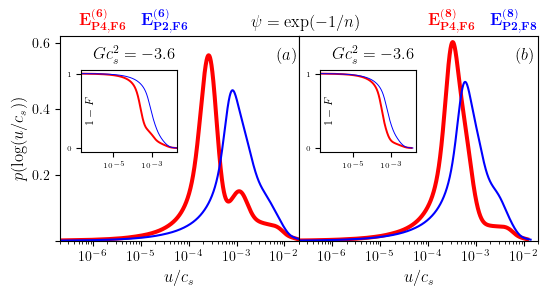

In [35]:
# Display Figure 7 (a), (b) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_7_ab.png")

### Figure 7 (c) and (d)

In [37]:
# Figure 7 (c) and (d) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_7_cd.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
4096 4096 0.9991961217496044
4096 4096 0.999156783110833


4096 4096 0.999470657733818
4096 4096 0.9992532682455293


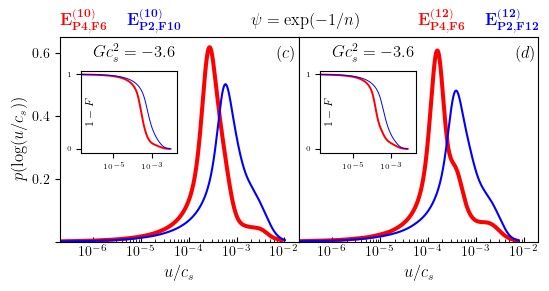

In [38]:
# Display Figure 7 (c), (d) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_7_cd.png")

### Figure 7 (e) and (f)

In [40]:
# Figure 7 (e) and (f) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_7_ef.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
8192 8192 0.002907032745048143
8192 8192 0.0027913329202432402


8192 8192 0.0029707358118207868
8192 8192 0.0027651822693790054


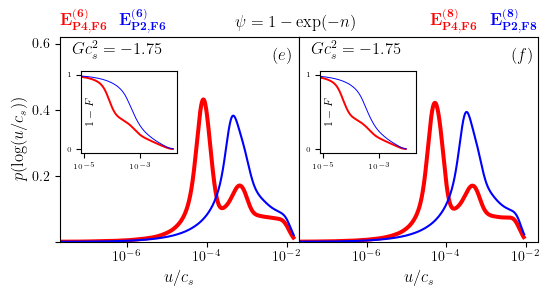

In [41]:
# Display Figure 7 (e), (f) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
## Make sure 
from IPython import display
display.Image("./reproduced-figures/figure_7_ef.png")

### Figure 7 (g) and (h)

In [42]:
# Figure 7 (g) and (h) (click arrow to unfold)
'''
last entry (100) is for the resolution in DPI
the value is 200 for the published version
'''
_args = [device_str, lang, 100]
print(_args)
%run figure_7_gh.py {_args[0]} {_args[1]} {_args[2]}

['NVIDIA_GeForce_RTX_4090__12__4__0_', 'pycuda', 100]
4096 4096 0.9976034681505996
4096 4096 0.9964502691506546
4096 4096 0.9971872987744086
4096 4096 0.9959182858712345


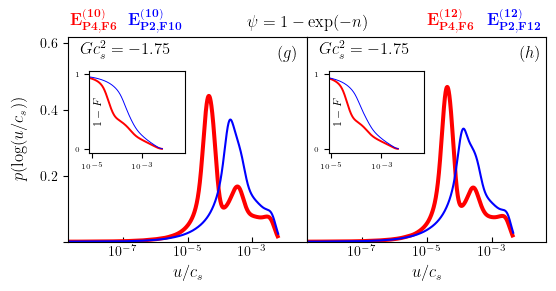

In [43]:
# Display Figure 7 (g), (h) (click arrow to unfold + see comment below)
## After displaying the image make sure to go to "Kernel -> Restart & Clear Output"
## It looks like a bug prevents codefolding/table of contents to load properly if
## the notebook is saved and restored with the images opened.
from IPython import display
display.Image("./reproduced-figures/figure_7_gh.png")

## Appendix

### Appendix C

Here we report the symbolic calculations presented in Appendix C, concerning the expressions of the weights $W(\ell)$ as a function of the isotropy constants $e_{2n}$ and $\varepsilon$.

In [44]:
# Equations (C1), (C2), (C3) and (C4) (click arrow to unfold)
import sys 
sys.path.append("../../")
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from sympy.solvers import solve
from sympy import simplify, collect, cancel, apart, factor, ratsimp, together

from IPython.display import display

from idpy.LBM.SCFStencils import SCFStencils, BasisVectors

def GetEpsilonExpr(stencil):
    '''
    GetVarepsilon: 
    function for printing the value of \varepsilon
    the 5 weights expression is assumed
    '''    
    w1, w2, w4, w5, w8, w9, w10 = sp_symbols("w(1) w(2) w(4) w(5) w(8) w(9) w(10)")
    w13, w16, w17 = sp_symbols("w(13) w(16) w(17)")
    eps = sp_symbols('\\varepsilon')
    w_sym_list = [w1, w2, w4, w5, w8, w9, w10, w13, w16, w17]
    
    eps_expr = \
        (48*w4 + 96*w5 + 96*w8 + 288*w9 + 576*w10 + 704*w13 + 960*w16 + 1920*w17)/\
        (6*w1 + 12*w2 + 72*w4 + 156*w5 + 144*w8 + 342*w9 + 
         696*w10 + 812*w13 + 1056*w16 + 2124*w17)
    
    for i in range(10 - len(stencil.w_sym_list)):
        eps_expr = eps_expr.subs(w_sym_list[len(stencil.w_sym_list) + i], 0)
    
    return eps_expr

def GetIsotropyConditionsSym(stencil, order, weights_list = None):
    '''
    GetIsotropyConditions: 
    function for printing the isotropy conditions
    for a given stencil and an arbitrary set of weights
    compatibly with the stencil. If no set of weights
    is provided the solution already provided by the 
    stencil class is used
    '''
    if weights_list is None:
        weights_list = stencil.w_sol[0]
        
    _swap_sym = sp_symbols('I_{' + str(order) + '\,0}')
    display(_swap_sym)
    display(stencil.B2n_expr[order][0])
    _value = stencil.B2n_expr[order][0]
    for w_i in range(len(stencil.w_sym_list)):
        _value = _value.subs(stencil.w_sym_list[w_i], 
                             weights_list[w_i])
    display(together(ratsimp(simplify(_value))))
    print()
    
    for i in range(len(stencil.B2q_expr[order])):
        _swap_sym = sp_symbols('I_{' + str(order) + '\,' + str(i + 1) + '}')
        display(_swap_sym)
        display(stencil.B2q_expr[order][i])
        _value = stencil.B2q_expr[order][i]
        for w_i in range(len(stencil.w_sym_list)):
            _value = _value.subs(stencil.w_sym_list[w_i], 
                                 weights_list[w_i])
        display(together(ratsimp(simplify(_value))))
        print()
        
def GetLambdaChiSym(weights_list):
    w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
    chi_i, lambda_i = sp_symbols('\\chi_I \\Lambda_I')
    w_sym_list = [w1, w2, w4, w5, w8]
    
    chi_i_expr = 2*w4 - 8*w8 - w5
    lambda_i_expr = sp_Rational('1/2')*w1 - 2*w2 + 6*w4 - 24*w8 - 6*w5
    
    display(lambda_i)
    display(lambda_i_expr)
    _value = lambda_i_expr
    for w_i in range(len(weights_list)):
        _value = _value.subs(w_sym_list[w_i], 
                             weights_list[w_i])
    display(together(ratsimp(simplify(_value))))
    print()    
    
    display(chi_i)
    display(chi_i_expr)
    _value = chi_i_expr
    for w_i in range(len(weights_list)):
        _value = _value.subs(w_sym_list[w_i], 
                             weights_list[w_i])
    display(together(ratsimp(simplify(_value))))
    print()

E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                      len_2s = [1, 2, 4, 5, 8])

E8_P2F8.GetWolfEqs()
E8_P2F8.GetTypEqs()

eps_expr = GetEpsilonExpr(E8_P2F8)
eps_sym = sp_symbols("\\varepsilon")

equations = []
equations += [E8_P2F8.e_sym[2] - E8_P2F8.e_expr[2]]
equations += [E8_P2F8.e_sym[4] - E8_P2F8.e_expr[4]]
equations += [E8_P2F8.e_sym[6] - E8_P2F8.e_expr[6]]
equations += [E8_P2F8.e_sym[8] - E8_P2F8.e_expr[8]]
equations += [eps_sym - eps_expr]

print("The system of equations reads (=0 is understood):")
for _eq in equations:
    display(_eq)

print()
print()
print("These are the solutions:")
w_sol = solve(equations, E8_P2F8.w_sym_list)
w_sol_nice = {}

for _w_sym in E8_P2F8.w_sym_list:
    w_sol_nice[_w_sym] = together(ratsimp(w_sol[_w_sym]))
    display(_w_sym)
    display(w_sol_nice[_w_sym])
    
print()
print()
print("The forcing isotropy conditions read:")
w_sol_nice_list = [w_sol_nice[_w_sym] for _w_sym in w_sol_nice]

GetIsotropyConditionsSym(E8_P2F8, 4, w_sol_nice_list)
GetIsotropyConditionsSym(E8_P2F8, 6, w_sol_nice_list)
GetIsotropyConditionsSym(E8_P2F8, 8, w_sol_nice_list)

print()
print()
print("The 4-th order pressure tensor isotropy conditions read:")
GetLambdaChiSym(w_sol_nice_list)

The system of equations reads (=0 is understood):


e_{2} - 2*w(1) - 4*w(2) - 8*w(4) - 20*w(5) - 16*w(8)

e_{4} - 4*w(2) - 32*w(5) - 64*w(8)

e_{6} - 4*w(2)/3 - 80*w(5)/3 - 256*w(8)/3

e_{8} - 4*w(2)/9 - 128*w(5)/9 - 1024*w(8)/9

\varepsilon - (48*w(4) + 96*w(5) + 96*w(8))/(6*w(1) + 12*w(2) + 72*w(4) + 156*w(5) + 144*w(8))



These are the solutions:


w(1)

(18*e_{2}*(\varepsilon - 1) + 6*e_{2} - 20*e_{4}*(\varepsilon - 1) + 27*e_{6}*(\varepsilon - 1) - 9*e_{8}*(\varepsilon - 1))/(24*(\varepsilon - 1))

w(2)

(16*e_{4} - 24*e_{6} + 9*e_{8})/36

w(4)

(-6*e_{2}*(\varepsilon - 1) - 6*e_{2} + 5*e_{4}*(\varepsilon - 1) - 18*e_{6}*(\varepsilon - 1) + 9*e_{8}*(\varepsilon - 1))/(96*(\varepsilon - 1))

w(5)

(-4*e_{4} + 15*e_{6} - 9*e_{8})/144

w(8)

(e_{4} - 6*e_{6} + 9*e_{8})/576



The forcing isotropy conditions read:


I_{4,0}

2*w(1) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8)

(-e_{2}*(\varepsilon - 1) - 3*e_{2} - 6*e_{4}*(\varepsilon - 1))/(2*(\varepsilon - 1))

I_{6,0}

2*w(1) - 16*w(2) + 128*w(4) - 140*w(5) - 1024*w(8)

(-13*e_{2}*(\varepsilon - 1) - 15*e_{2} - 30*e_{6}*(\varepsilon - 1))/(2*(\varepsilon - 1))

I_{8,0}

2*w(1) + 32*w(2) + 512*w(4) - 2108*w(5) + 8192*w(8)

(-61*e_{2}*(\varepsilon - 1) - 63*e_{2} + 224*e_{4}*(\varepsilon - 1) - 840*e_{6}*(\varepsilon - 1) + 630*e_{8}*(\varepsilon - 1))/(2*(\varepsilon - 1))

I_{8,1}

-8*w(2)/3 + 176*w(5)/3 - 2048*w(8)/3

-4*e_{4} + 15*e_{6} - 15*e_{8}




The 4-th order pressure tensor isotropy conditions read:


\Lambda_I

w(1)/2 - 2*w(2) + 6*w(4) - 6*w(5) - 24*w(8)

(-36*e_{2} - 125*e_{4}*(\varepsilon - 1) + 57*e_{6}*(\varepsilon - 1) - 18*e_{8}*(\varepsilon - 1))/(144*(\varepsilon - 1))

\chi_I

2*w(4) - w(5) - 8*w(8)

(-18*e_{2}*(\varepsilon - 1) - 18*e_{2} + 17*e_{4}*(\varepsilon - 1) - 57*e_{6}*(\varepsilon - 1) + 18*e_{8}*(\varepsilon - 1))/(144*(\varepsilon - 1))

### Appendix D
Here we provide the connection between Equation (D14) and (D15)

In [45]:
# Verification of equation (D15) (click arrow to unfold)
import sys 
sys.path.append("../../")
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from IPython.display import display

from idpy.LBM.SCFStencils import SCFStencils, BasisVectors

S5_E12_P2F12 = SCFStencils(E = BasisVectors(x_max = 4), 
                           len_2s = [1, 2, 4, 5, 8, 9, 10, 13, 16, 17])

S5_E12_P2F12.GetWolfEqs()
S5_E12_P2F12.FindWeights()

w1, w2, w4, w5, w8 = sp_symbols("w(1) w(2) w(4) w(5) w(8)")
w9, w10, w13, w16, w17 = sp_symbols("w(9) w(10) w(13) w(16) w(17)")

_sigma_c_E8 = -(w1 + 16*w4 + 18*w5)/2
_sigma_c_E10 = _sigma_c_E8 - (81*w9 + 128*w10)/2
_sigma_c_E12 = _sigma_c_E10 - (50*w13 + 256*w16 + 450*w17)/2

display(S5_E12_P2F12.e_sym[4])
display(S5_E12_P2F12.e_expr[4])

display(sp_symbols('I_{4\,0}'))
display(S5_E12_P2F12.typ_eq_s[4][0])

display(sp_symbols('\hat{\sigma}'))
display(_sigma_c_E12)
print("Now we verify Eq.(D15)")
display(-S5_E12_P2F12.e_sym[4]/2-sp_symbols('I_{4\,0}')/4)
display(-S5_E12_P2F12.e_expr[4]/2 - S5_E12_P2F12.typ_eq_s[4][0]/4)

e_{4}

72*w(10) + 288*w(13) + 128*w(17) + 4*w(2) + 32*w(5) + 64*w(8)

I_{4,0}

2*w(1) + 112*w(10) - 476*w(13) + 512*w(16) + 644*w(17) - 8*w(2) + 32*w(4) - 28*w(5) - 128*w(8) + 162*w(9)

\hat{\sigma}

-w(1)/2 - 64*w(10) - 25*w(13) - 128*w(16) - 225*w(17) - 8*w(4) - 9*w(5) - 81*w(9)/2

Now we verify Eq.(D15)


-I_{4,0}/4 - e_{4}/2

-w(1)/2 - 64*w(10) - 25*w(13) - 128*w(16) - 225*w(17) - 8*w(4) - 9*w(5) - 81*w(9)/2

### Appendix F

Here we show that starting from Eq. (F3) one can recover Eq. (F2). Since the coefficients of different vector groups are independent on each other, by checking a stencil yielding high order forcing isotropy one automatically checks the consistency of all lower orders.

The 14-th order for the forcing is imposed as a limit given the actual structure of the code which uses only the square length to label different vector groups. As discussed in the manuscript this is not sufficient as soon as $\ell > 25$

In [46]:
# Check link between (F3) and (F2) (click arrow to unfold)
import sys 
sys.path.append("../../")
from sympy import symbols as sp_symbols
from sympy import Rational as sp_Rational
from IPython.display import display

from idpy.LBM.SCFStencils import SCFStencils, BasisVectors

E14_P2F14 = SCFStencils(E = BasisVectors(x_max = 5), 
                        len_2s = [1, 2, 
                                  4, 
                                  5, 8, 
                                  9, 10, 
                                  13, 16, 17, 
                                  18, 20, 25])

E8_P2F8 = SCFStencils(E = BasisVectors(x_max = 2), 
                      len_2s = [1, 2, 4, 5, 8])

print("Weights for the 14-th order isotropy stencil")
for elem in E14_P2F14.FindWeights():
    display(elem)
print()

print("Computing Eqs. (F2) and (F3)")
E14_P2F14.RecoverTypEqs()
E14_P2F14.GetTypEqs()
print()

print("Comparison")
for n2 in range(4, 16, 2):
    for k in range(len(E14_P2F14.rec_typ_eq_s[n2])):
        display(sp_symbols('\hat{I}_{' + str(n2) + '\,' + str(k) + '}'))
        print("Result from (F3): ")
        display(E14_P2F14.rec_typ_eq_s[n2][k])
        print("Corresponding in (F2): ")
        display(E14_P2F14.typ_eq_s[n2][k])
        print("Subtraction: ", 
              E14_P2F14.rec_typ_eq_s[n2][k] - E14_P2F14.typ_eq_s[n2][k])
        print()

Weights for the 14-th order isotropy stencil


19414/228375

549797/10048500

175729/7917000

50728/3628625

3029/913500

15181/7536375

221/182700

68/279125

1139/26796000

68/2968875

17/1425060

17/5742000

1/32657625


Computing Eqs. (F2) and (F3)

Comparison


\hat{I}_{4,0}

Result from (F3): 


2*w(1) + 112*w(10) - 476*w(13) + 512*w(16) + 644*w(17) - 648*w(18) - 8*w(2) - 448*w(20) - 858*w(25) + 32*w(4) - 28*w(5) - 128*w(8) + 162*w(9)

Corresponding in (F2): 


2*w(1) + 112*w(10) - 476*w(13) + 512*w(16) + 644*w(17) - 648*w(18) - 8*w(2) - 448*w(20) - 858*w(25) + 32*w(4) - 28*w(5) - 128*w(8) + 162*w(9)

Subtraction:  0



\hat{I}_{6,0}

Result from (F3): 


2*w(1) + 1120*w(10) - 6188*w(13) + 8192*w(16) + 10948*w(17) - 11664*w(18) - 16*w(2) - 8960*w(20) - 21450*w(25) + 128*w(4) - 140*w(5) - 1024*w(8) + 1458*w(9)

Corresponding in (F2): 


2*w(1) + 1120*w(10) - 6188*w(13) + 8192*w(16) + 10948*w(17) - 11664*w(18) - 16*w(2) - 8960*w(20) - 21450*w(25) + 128*w(4) - 140*w(5) - 1024*w(8) + 1458*w(9)

Subtraction:  0



\hat{I}_{8,0}

Result from (F3): 


1872*w(10) - 3312*w(13) + 39104*w(17)/3 - 17496*w(18) - 8*w(2)/3 + 45056*w(20)/3 - 82368*w(25) + 176*w(5)/3 - 2048*w(8)/3

Corresponding in (F2): 


1872*w(10) - 3312*w(13) + 39104*w(17)/3 - 17496*w(18) - 8*w(2)/3 + 45056*w(20)/3 - 82368*w(25) + 176*w(5)/3 - 2048*w(8)/3

Subtraction:  0



\hat{I}_{8,1}

Result from (F3): 


2*w(1) + 5584*w(10) - 70508*w(13) + 131072*w(16) + 147012*w(17) - 157464*w(18) - 24*w(2) - 224256*w(20) - 289146*w(25) + 512*w(4) - 876*w(5) - 6144*w(8) + 13122*w(9)

Corresponding in (F2): 


2*w(1) + 5584*w(10) - 70508*w(13) + 131072*w(16) + 147012*w(17) - 157464*w(18) - 24*w(2) - 224256*w(20) - 289146*w(25) + 512*w(4) - 876*w(5) - 6144*w(8) + 13122*w(9)

Subtraction:  0



\hat{I}_{10,0}

Result from (F3): 


18720*w(10) - 43056*w(13) + 664768*w(17)/3 - 314928*w(18) - 16*w(2)/3 + 901120*w(20)/3 - 2059200*w(25) + 880*w(5)/3 - 16384*w(8)/3

Corresponding in (F2): 


18720*w(10) - 43056*w(13) + 664768*w(17)/3 - 314928*w(18) - 16*w(2)/3 + 901120*w(20)/3 - 2059200*w(25) + 880*w(5)/3 - 16384*w(8)/3

Subtraction:  0



\hat{I}_{10,1}

Result from (F3): 


2*w(1) - 320*w(10) - 787436*w(13) + 2097152*w(16) + 1834436*w(17) - 1889568*w(18) - 32*w(2) - 5386240*w(20) - 1051050*w(25) + 2048*w(4) - 5260*w(5) - 32768*w(8) + 118098*w(9)

Corresponding in (F2): 


2*w(1) - 320*w(10) - 787436*w(13) + 2097152*w(16) + 1834436*w(17) - 1889568*w(18) - 32*w(2) - 5386240*w(20) - 1051050*w(25) + 2048*w(4) - 5260*w(5) - 32768*w(8) + 118098*w(9)

Subtraction:  0



\hat{I}_{12,0}

Result from (F3): 


92016*w(10)/5 - 98496*w(13)/5 + 1086464*w(17)/5 - 4251528*w(18)/5 - 8*w(2)/5 + 7602176*w(20)/5 - 27454464*w(25)/5 + 1856*w(5)/5 - 32768*w(8)/5

Corresponding in (F2): 


92016*w(10)/5 - 98496*w(13)/5 + 1086464*w(17)/5 - 4251528*w(18)/5 - 8*w(2)/5 + 7602176*w(20)/5 - 27454464*w(25)/5 + 1856*w(5)/5 - 32768*w(8)/5

Subtraction:  0



\hat{I}_{12,1}

Result from (F3): 


156528*w(10) - 526896*w(13) + 3404864*w(17) - 4251528*w(18) - 8*w(2) + 3473408*w(20) - 42328512*w(25) + 848*w(5) - 32768*w(8)

Corresponding in (F2): 


156528*w(10) - 526896*w(13) + 3404864*w(17) - 4251528*w(18) - 8*w(2) + 3473408*w(20) - 42328512*w(25) + 848*w(5) - 32768*w(8)

Subtraction:  0



\hat{I}_{12,2}

Result from (F3): 


2*w(1) - 472784*w(10) - 8655980*w(13) + 33554432*w(16) + 20970820*w(17) - 21257640*w(18) - 40*w(2) - 118145024*w(20) + 100709286*w(25) + 8192*w(4) - 28844*w(5) - 163840*w(8) + 1062882*w(9)

Corresponding in (F2): 


2*w(1) - 472784*w(10) - 8655980*w(13) + 33554432*w(16) + 20970820*w(17) - 21257640*w(18) - 40*w(2) - 118145024*w(20) + 100709286*w(25) + 8192*w(4) - 28844*w(5) - 163840*w(8) + 1062882*w(9)

Subtraction:  0



\hat{I}_{14,0}

Result from (F3): 


184032*w(10) - 1280448*w(13)/5 + 18469888*w(17)/5 - 76527504*w(18)/5 - 16*w(2)/5 + 30408704*w(20) - 137272320*w(25) + 1856*w(5) - 262144*w(8)/5

Corresponding in (F2): 


184032*w(10) - 1280448*w(13)/5 + 18469888*w(17)/5 - 76527504*w(18)/5 - 16*w(2)/5 + 30408704*w(20) - 137272320*w(25) + 1856*w(5) - 262144*w(8)/5

Subtraction:  0



\hat{I}_{14,1}

Result from (F3): 


1258560*w(10) - 6422832*w(13) + 155178176*w(17)/3 - 51018336*w(18) - 32*w(2)/3 + 56360960*w(20)/3 - 829425600*w(25) + 3440*w(5)/3 - 524288*w(8)/3

Corresponding in (F2): 


1258560*w(10) - 6422832*w(13) + 155178176*w(17)/3 - 51018336*w(18) - 32*w(2)/3 + 56360960*w(20)/3 - 829425600*w(25) + 3440*w(5)/3 - 524288*w(8)/3

Subtraction:  0



\hat{I}_{14,2}

Result from (F3): 


2*w(1) - 8503520*w(10) - 93259244*w(13) + 536870912*w(16) + 201325764*w(17) - 229582512*w(18) - 48*w(2) - 2419261440*w(20) + 5006008950*w(25) + 32768*w(4) - 147660*w(5) - 786432*w(8) + 9565938*w(9)

Corresponding in (F2): 


2*w(1) - 8503520*w(10) - 93259244*w(13) + 536870912*w(16) + 201325764*w(17) - 229582512*w(18) - 48*w(2) - 2419261440*w(20) + 5006008950*w(25) + 32768*w(4) - 147660*w(5) - 786432*w(8) + 9565938*w(9)

Subtraction:  0

